In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('models-implementation-and-evaluation')
jovian.set_colab_id('1ldMRF3pBTuklJD3HtGmjsoVcwL1UujW6')

<a id='top'></a>
## Table of Contents
1. [Data Understanding and Project Proposal](#dupp)
2. [Models Implementation and Evaluation](#mie)
    1. [Movie Profitability Regression](#reg)
        1. [Additional Features Engineering](#afer)
        2. [DummyRegressor](#dr)
        3. [DecisionTreeRegressor](#dtr)
        4. [MLPRegressor](#mlpr)
        5. [CNN-SVR/XGBoost](#cnn-svr)
        6. [RandomForestRegressor](#rfr)
        7. [GradientBoostingRegressor](#gbr)
        8. [AutoSklearnRegressor](#asr)
        9. [Experiments](#expr)
    2. [Movie Profitability Classification](#clf)
        1. [Additional Features Engineering](#afec)
        2. [Handling Unbalanced Data](#hud)
        3. [DummyClassifier](#dc)
        4. [DecisionTreeClassifier](#dtc)
        5. [MLPClassifier](#mlpc)
        6. [CNN-SVC/XGBoost](#cnn-svc)
        7. [RandomForestClassifier](#rfc)
        8. [GradientBoostingClassifier](#gbc)
        9. [AutoSklearnClassifier](#asc)
        10. [Experiments](#expc)

<a id='dupp'></a>
# 1. Data Understanding and Project Proposal ([to top](#top))
https://jovian.ai/lilanpei/data-understanding-and-project-proposal

<a id='mie'></a>
# 2. Models Implementation and Evaluation ([to top](#top))

<a id='reg'></a>
## A. Movie Profitability Regression ([to top](#top))

<a id='afer'></a>
### 1). Additional Features Engineering([to top](#top))

In [2]:
!pip3 install auto-sklearn
!pip3 install -U git+https://github.com/scikit-learn-contrib/imbalanced-learn.git

     |████████████████████████████████| 6.3 MB 4.5 MB/s 
     |████████████████████████████████| 38.2 MB 24 kB/s 
     |████████████████████████████████| 22.3 MB 27 kB/s 
     |████████████████████████████████| 722 kB 47.1 MB/s 
     |████████████████████████████████| 4.2 MB 43.1 MB/s 
     |████████████████████████████████| 4.0 MB 35.8 MB/s 
     |████████████████████████████████| 208 kB 57.7 MB/s 
     |████████████████████████████████| 973 kB 32.0 MB/s 
     |████████████████████████████████| 132 kB 57.8 MB/s 
     |████████████████████████████████| 45 kB 3.7 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.0-py3-none-any.whl size=6585992 sha256=464313fb8cd685c31acee9a897cfaccdd611c725bd97dc1c58024eec3abe2e9c
  Stored in directory: /root/.cache/pip/wheels/c5/56/cc/e33d4a8cb4ffeb040d59ea08c4715d20806945dc80d3c25384
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7044 sha256=8f36eede2eba914668419a7e5f76a25bafa40a754979bbcb895c62dc36de5881


**Note:** The auto-sklearn installation ask to **restart the runtime**:

In [ ]:
# Kill the current Python runtime process
import os
os.kill(os.getpid(), 9)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Handling Cyclical Features - month:
 [Feature Engineering - Handling Cyclical Features](http://blog.davidkaleko.com/feature-engineering-cyclical-features.html)

In [346]:
%matplotlib inline
import re
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, GradientBoostingRegressor, GradientBoostingClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.dummy import DummyRegressor, DummyClassifier
import warnings
import math
from time import strptime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import r2_score, accuracy_score, classification_report, plot_confusion_matrix, plot_roc_curve, roc_auc_score
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import matplotlib.ticker as plticker
from numpy import mean
from numpy import std
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from keras import initializers
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn.metrics
import autosklearn.regression
import autosklearn.classification
from imblearn.over_sampling import SMOTE
import six
import sys
import xgboost as xgb
from sklearn.metrics import precision_recall_fscore_support as score
import tabulate
from IPython.display import display, HTML
sys.modules['sklearn.externals.six'] = six
warnings.filterwarnings("ignore")
np.random.seed(42)

In [347]:
df = pd.read_csv('/content/drive/MyDrive/BDA/input/eda_df.csv')

In [348]:
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8856 entries, 0 to 8855
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   genres                8856 non-null   object
 1   overview              8852 non-null   object
 2   production_companies  8856 non-null   object
 3   production_countries  8856 non-null   object
 4   tagline               6709 non-null   object
 5   title_tmdb            8856 non-null   object
 6   writer                8856 non-null   object
 7   actors_tmdb           8856 non-null   object
 8   director_tmdb         8856 non-null   object
 9   keywords              8856 non-null   object
 10  month                 8856 non-null   object
dtypes: object(11)
memory usage: 761.2+ KB


In [349]:
df['month'] = df['month'].apply(lambda m: strptime(m,'%b').tm_mon)

In [350]:
df['month'].describe()

count    8856.000000
mean        6.785005
std         3.455103
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: month, dtype: float64

Months are numbered one through twelve.

In [351]:
df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

We map the cyclical variable onto a circle such that the lowest value for that variable appears right next to the largest value. We compute the x- and y- component of that point using sin and cos trigonometric functions.

Note that when we perform this transformation for the "month" variable, we also shift the values down by one such that it extends from 0 to 11, for convenience.

The claim is that using this transform will improve the predictive performance of our models.

In [352]:
df = df.drop('month', axis=1)

#### **Encoding genres**:

In [353]:
df['genres'] = df['genres'].apply(ast.literal_eval).values.tolist()
genres = set(df.apply(lambda x: pd.Series(x['genres']).astype(str),axis=1).stack().reset_index(level=1, drop=True))

In [354]:
genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Sport',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [355]:
for genre in genres:
  df['is_' + genre] = df['genres'].apply(
      lambda values: int(genre in values)
  )

In [356]:
df = df.drop('genres', axis=1)

#### **Encoding production_countries:**

In [357]:
df['production_countries'] = df['production_countries'].apply(ast.literal_eval).values.tolist()
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [358]:
coun_df = df.drop('production_countries', axis=1).join(s)
coun_df = pd.DataFrame(coun_df['countries'].value_counts())

In [359]:
coun_df = df.drop('production_countries', axis=1).join(s)
coun_df = pd.DataFrame(coun_df['countries'].value_counts())
coun_df['country'] = coun_df.index
coun_df.columns = ['num_movies', 'country']
coun_df = coun_df.reset_index().drop('index', axis=1)

In [360]:
coun_df.shape

(103, 2)

In [361]:
coun_df = coun_df[coun_df['num_movies']>(len(df)*0.01)]

In [362]:
coun_df

num_movies                   country
0         6531  United States of America
1          982            United Kingdom
2          689                    France
3          528                   Germany
4          401                    Canada
5          237                     India
6          190                    Russia
7          189                     Italy
8          178                 Australia
9          160                     Japan
10         160                     Spain
11         132                     China
12         114                 Hong Kong
13         106               South Korea

In [363]:
set(coun_df['country'])

{'Australia',
 'Canada',
 'China',
 'France',
 'Germany',
 'Hong Kong',
 'India',
 'Italy',
 'Japan',
 'Russia',
 'South Korea',
 'Spain',
 'United Kingdom',
 'United States of America'}

In [364]:
for country in set(coun_df['country']):
  df[country] = df['production_countries'].apply(
      lambda values: int(country in values)
  )

In [365]:
  df['other_country'] = df['production_countries'].apply(
      lambda values: 1 if len(set(values)-set(coun_df['country'])) > 0 else 0
  )

In [366]:
df[df['other_country']==1]['production_countries']

42                    [Belgium, France, Italy]
56                                      [Iran]
58      [Netherlands, United Kingdom, Belgium]
124          [France, Belgium, United Kingdom]
131        [United Kingdom, Macedonia, France]
                         ...                  
8832                 [France, Sweden, Denmark]
8840                                  [Poland]
8841                                  [Norway]
8842                         [Belgium, France]
8847                                 [Finland]
Name: production_countries, Length: 1025, dtype: object

In [367]:
df = df.drop('production_countries', axis=1)

#### **Encoding production_companies by Clustering:**

In [368]:
df['production_companies'] = df['production_companies'].apply(ast.literal_eval).values.tolist()
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [369]:
comp_df = df.drop('production_companies', axis=1).join(s).reset_index().drop('index', axis=1)

In [370]:
comp_df = comp_df[~comp_df['companies'].isnull()]

In [371]:
comp_df.shape, df.shape

((18465, 64), (8856, 64))

In [372]:
companies_df = comp_df[['companies']].drop_duplicates()

In [373]:
companies_df.shape

(6139, 1)

Extract RFM features from describing production_companies profile:

In [374]:
max_year = comp_df.year.max()
companies_df['Lastyear'] = comp_df.groupby('companies')['year'].transform('max').astype('int')
companies_df['Monetary'] = comp_df.groupby('companies')['budget_tmdb'].transform('mean')
companies_df['avg_count'] = comp_df.groupby('companies')['vote_count'].transform('mean')
companies_df['avg_vote'] = comp_df.groupby('companies')['vote_average'].transform('mean')
companies_df['Recency'] = pd.Series(max_year - companies_df['Lastyear'])
companies_df['Frequency'] = comp_df.groupby('companies')['id'].transform('count')
companies_df = companies_df.drop('Lastyear', axis=1)

In [375]:
companies_df.head()

companies      Monetary  ...  Recency  Frequency
0    Pixar Animation Studios  1.486667e+08  ...        0         18
1           TriStar Pictures  2.657033e+07  ...        0        136
2               Teitler Film  6.500000e+07  ...       12          2
3  Interscope Communications  2.035158e+07  ...       17         19
4               Warner Bros.  4.202192e+07  ...        0        474

[5 rows x 6 columns]

In [376]:
companies_df_copy = companies_df.copy()
companies_df_copy = companies_df_copy.drop('companies', axis=1)

Normalization by Min-Max:

In [377]:
scaler_m = MinMaxScaler()
X_m = scaler_m.fit_transform(companies_df_copy.values)
X_m[:5]

array([[0.53095238, 0.38917533, 0.68518519, 0.        , 0.03379722],
       [0.09489404, 0.0344251 , 0.5620098 , 0.        , 0.26838966],
       [0.23214285, 0.14065367, 0.61111111, 0.11764706, 0.00198807],
       [0.07268421, 0.0262399 , 0.51111111, 0.16666667, 0.03578529],
       [0.15007827, 0.07954082, 0.58907642, 0.        , 0.94035785]])

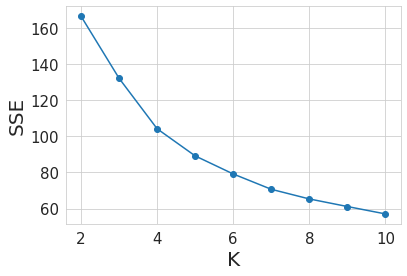

In [378]:
sse_list = list()
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters = k, n_init=10, max_iter=100, random_state=0)
    kmeans.fit(X_m)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
plt.plot(range(2, len(sse_list) + 2), sse_list,'-o')
plt.ylabel('SSE', fontsize=20)
plt.xlabel('K', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [379]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=100, random_state=0)
kmeans.fit(X_m)

KMeans(max_iter=100, n_clusters=4, random_state=0)

In [380]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 3020, 1: 1735, 2: 934, 3: 450}

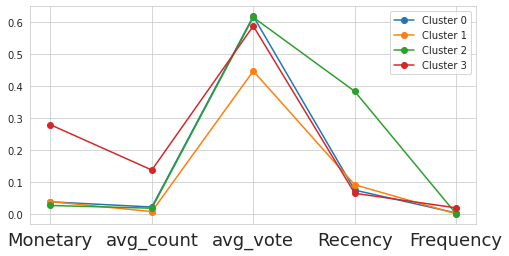

In [381]:
plt.figure(figsize=(8, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(companies_df_copy.columns)), companies_df_copy.columns, fontsize=18)
plt.legend(fontsize=10)
plt.show()

In [382]:
companies_df['K-Means_Labels'] = kmeans.labels_

In [383]:
companies_df.head()

companies      Monetary  ...  Frequency  K-Means_Labels
0    Pixar Animation Studios  1.486667e+08  ...         18               3
1           TriStar Pictures  2.657033e+07  ...        136               0
2               Teitler Film  6.500000e+07  ...          2               3
3  Interscope Communications  2.035158e+07  ...         19               1
4               Warner Bros.  4.202192e+07  ...        474               3

[5 rows x 7 columns]

In [384]:
companies_dic = companies_df[['companies','K-Means_Labels']].set_index('companies').to_dict()

In [385]:
df['labels'] = df['production_companies'].apply(lambda values: list(map(lambda x: companies_dic['K-Means_Labels'][x], values)))

In [386]:
for label in range(len(kmeans.cluster_centers_)):
  df['companies_label_'+str(label)] = df['labels'].apply(
      lambda values: int(label in values)
  )

In [387]:
df = df.drop(['labels','production_companies'],axis=1)

#### **Encoding writer by Clustering:**

In [388]:
df['writer'] = df['writer'].apply(ast.literal_eval).values.tolist()
s = df.apply(lambda x: pd.Series(x['writer']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'writers'

In [389]:
writ_df = df.drop('writer', axis=1).join(s).reset_index().drop('index', axis=1)

In [390]:
writ_df = writ_df[~writ_df['writers'].isnull()]

In [391]:
writ_df.shape, df.shape

((15106, 67), (8856, 67))

In [392]:
writer_df = writ_df[['writers']].drop_duplicates()

In [393]:
writer_df.shape

(8560, 1)

Extract RFM features from describing writer profile:

In [394]:
max_year = writ_df.year.max()
writer_df['Lastyear'] = writ_df.groupby('writers')['year'].transform('max').astype('int')
writer_df['Monetary'] = writ_df.groupby('writers')['budget_tmdb'].transform('mean')
writer_df['avg_count'] = writ_df.groupby('writers')['vote_count'].transform('mean')
writer_df['avg_vote'] = writ_df.groupby('writers')['vote_average'].transform('mean')
writer_df['Recency'] = pd.Series(max_year - writer_df['Lastyear'])
writer_df['Frequency'] = writ_df.groupby('writers')['id'].transform('count')
writer_df = writer_df.drop('Lastyear', axis=1)

In [395]:
writer_df.head()

writers      Monetary    avg_count  avg_vote  Recency  Frequency
0        John Lasseter  1.157143e+08  3295.000000  6.785714        4          7
1          Pete Docter  1.275000e+08  5950.500000  7.666667        2          6
2   Jonathan Hensleigh  6.828571e+07  1312.714286  6.414286        6          7
3          Greg Taylor  3.850000e+07  1230.000000  6.300000       21          2
4  Mark Steven Johnson  4.800000e+07   640.900000  5.470000       10         10

In [396]:
writer_df_copy = writer_df.copy()
writer_df_copy = writer_df_copy.drop('writers', axis=1)

Normalization by Min-Max:

In [397]:
scaler_m = MinMaxScaler()
X_m = scaler_m.fit_transform(writer_df_copy.values)
X_m[:5]

array([[0.44505494, 0.32897234, 0.64285714, 0.03921569, 0.15      ],
       [0.49038461, 0.59417757, 0.74074074, 0.01960784, 0.125     ],
       [0.26263736, 0.13100113, 0.6015873 , 0.05882353, 0.15      ],
       [0.14807692, 0.12274044, 0.58888889, 0.20588235, 0.025     ],
       [0.18461538, 0.06390692, 0.49666667, 0.09803922, 0.225     ]])

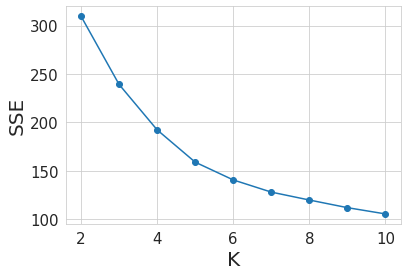

In [398]:
sse_list = list()
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters = k, n_init=10, max_iter=100, random_state=0)
    kmeans.fit(X_m)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
plt.plot(range(2, len(sse_list) + 2), sse_list,'-o')
plt.ylabel('SSE', fontsize=20)
plt.xlabel('K', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [399]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100, random_state=0)
kmeans.fit(X_m)

KMeans(max_iter=100, n_clusters=5, random_state=0)

In [400]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 793, 1: 3626, 2: 451, 3: 1644, 4: 2046}

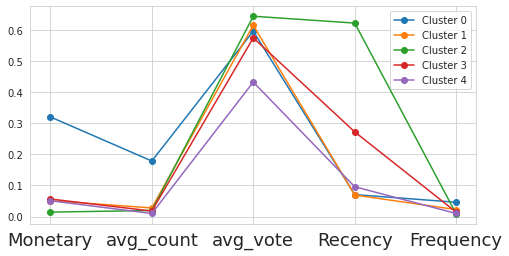

In [401]:
plt.figure(figsize=(8, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(writer_df_copy.columns)), writer_df_copy.columns, fontsize=18)
plt.legend(fontsize=10)
plt.show()

In [402]:
writer_df['K-Means_Labels'] = kmeans.labels_

In [403]:
writer_df.head()

writers      Monetary  ...  Frequency  K-Means_Labels
0        John Lasseter  1.157143e+08  ...          7               0
1          Pete Docter  1.275000e+08  ...          6               0
2   Jonathan Hensleigh  6.828571e+07  ...          7               0
3          Greg Taylor  3.850000e+07  ...          2               3
4  Mark Steven Johnson  4.800000e+07  ...         10               4

[5 rows x 7 columns]

In [404]:
writer_dic = writer_df[['writers','K-Means_Labels']].set_index('writers').to_dict()

In [405]:
df['labels'] = df['writer'].apply(lambda values: list(map(lambda x: writer_dic['K-Means_Labels'][x], values)))

In [406]:
for label in range(len(kmeans.cluster_centers_)):
  df['writer_label_'+str(label)] = df['labels'].apply(
      lambda values: int(label in values)
  )

In [407]:
df = df.drop(['labels','writer'],axis=1)

#### **Encoding director by Clustering:**

In [408]:
s = df.apply(lambda x: pd.Series(x['director_tmdb']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'directors'

In [409]:
dir_df = df.drop('director_tmdb', axis=1).join(s).reset_index().drop('index', axis=1)

In [410]:
dir_df = dir_df[~dir_df['directors'].isnull()]

In [411]:
dir_df.shape, df.shape

((8856, 71), (8856, 71))

In [412]:
director_df = dir_df[['directors']].drop_duplicates()

In [413]:
director_df.shape

(4065, 1)

Extract RFM features from describing director profile:

In [414]:
max_year = dir_df.year.max()
director_df['Lastyear'] = dir_df.groupby('directors')['year'].transform('max').astype('int')
director_df['Monetary'] = dir_df.groupby('directors')['budget_tmdb'].transform('mean')
director_df['avg_count'] = dir_df.groupby('directors')['vote_count'].transform('mean')
director_df['avg_vote'] = dir_df.groupby('directors')['vote_average'].transform('mean')
director_df['Recency'] = pd.Series(max_year - director_df['Lastyear'])
director_df['Frequency'] = dir_df.groupby('directors')['id'].transform('count')
director_df = director_df.drop('Lastyear', axis=1)

In [415]:
director_df.head()

directors      Monetary    avg_count  avg_vote  Recency  Frequency
0    John Lasseter  1.120000e+08  3557.400000  6.840000        6          5
1     Joe Johnston  7.488889e+07  1559.666667  6.355556        6          9
2    Howard Deutch  2.657143e+07   183.428571  6.014286        9          7
3  Forest Whitaker  2.533333e+07    97.333333  5.766667       13          3
4    Charles Shyer  3.420000e+07   101.600000  5.500000       13          5

In [416]:
director_df_copy = director_df.copy()
director_df_copy = director_df_copy.drop('directors', axis=1)

Normalization by Min-Max:

In [417]:
scaler_m = MinMaxScaler()
X_m = scaler_m.fit_transform(director_df_copy.values)
X_m[:5]

array([[0.54634146, 0.31079262, 0.64888889, 0.05882353, 0.1       ],
       [0.36531165, 0.13621137, 0.59506173, 0.05882353, 0.2       ],
       [0.12961672, 0.01594237, 0.55714286, 0.08823529, 0.15      ],
       [0.12357723, 0.00841854, 0.52962963, 0.12745098, 0.05      ],
       [0.16682926, 0.0087914 , 0.5       , 0.12745098, 0.1       ]])

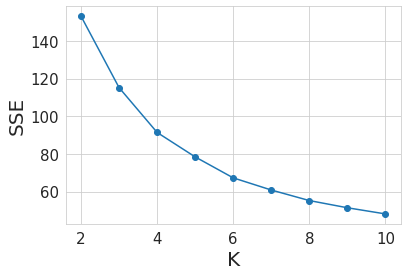

In [418]:
sse_list = list()
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters = k, n_init=10, max_iter=100, random_state=0)
    kmeans.fit(X_m)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
plt.plot(range(2, len(sse_list) + 2), sse_list,'-o')
plt.ylabel('SSE', fontsize=20)
plt.xlabel('K', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [419]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=100, random_state=0)
kmeans.fit(X_m)

KMeans(max_iter=100, n_clusters=4, random_state=0)

In [420]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 1270, 1: 399, 2: 2067, 3: 329}

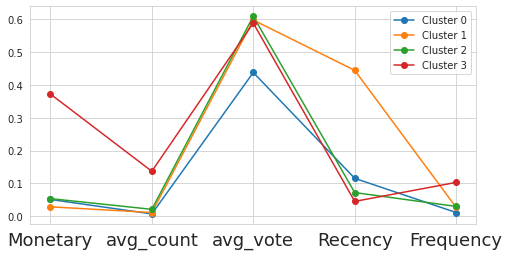

In [421]:
plt.figure(figsize=(8, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(director_df_copy.columns)), director_df_copy.columns, fontsize=18)
plt.legend(fontsize=10)
plt.show()

In [422]:
director_df['K-Means_Labels'] = kmeans.labels_

In [423]:
director_df.head()

directors      Monetary  ...  Frequency  K-Means_Labels
0    John Lasseter  1.120000e+08  ...          5               3
1     Joe Johnston  7.488889e+07  ...          9               3
2    Howard Deutch  2.657143e+07  ...          7               2
3  Forest Whitaker  2.533333e+07  ...          3               2
4    Charles Shyer  3.420000e+07  ...          5               0

[5 rows x 7 columns]

In [424]:
director_dic = director_df[['directors','K-Means_Labels']].set_index('directors').to_dict()

In [425]:
df['labels'] = df['director_tmdb'].apply(lambda value: director_dic['K-Means_Labels'][value])

In [426]:
for label in range(len(kmeans.cluster_centers_)):
  df['director_label_'+str(label)] = df['labels'].apply(
      lambda value: int(label == value)
  )

In [427]:
#df['director_freq'] = df['director_tmdb'].apply(lambda x: director_df[director_df['directors']==x]['Frequency'].values).astype('int')
#df['director_budget'] = df['director_tmdb'].apply(lambda x: director_df[director_df['directors']==x]['Monetary'].values).astype('float')
#df['director_recency'] = df['director_tmdb'].apply(lambda x: director_df[director_df['directors']==x]['Recency'].values).astype('int')

In [428]:
df = df.drop(['labels','director_tmdb'],axis=1)

#### **Encoding actors by Clustering:**

In [429]:
df['actors_tmdb'] = df['actors_tmdb'].apply(ast.literal_eval).values.tolist()
s = df.apply(lambda x: pd.Series(x['actors_tmdb']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actors'

In [430]:
act_df = df.drop('actors_tmdb', axis=1).join(s).reset_index().drop('index', axis=1)

In [431]:
act_df = act_df[~act_df['actors'].isnull()]

In [432]:
act_df.shape, df.shape

((26531, 74), (8856, 74))

In [433]:
actor_df = act_df[['actors']].drop_duplicates()

In [434]:
actor_df.shape

(9963, 1)

Extract RFM features from describing actor profile:

In [435]:
max_year = act_df.year.max()
actor_df['Lastyear'] = act_df.groupby('actors')['year'].transform('max').astype('int')
actor_df['Monetary'] = act_df.groupby('actors')['budget_tmdb'].transform('mean')
actor_df['avg_count'] = act_df.groupby('actors')['vote_count'].transform('mean')
actor_df['avg_vote'] = act_df.groupby('actors')['vote_average'].transform('mean')
actor_df['Recency'] = pd.Series(max_year - actor_df['Lastyear'])
actor_df['Frequency'] = act_df.groupby('actors')['id'].transform('count')
actor_df = actor_df.drop('Lastyear', axis=1)

In [436]:
actor_df.head()

actors      Monetary    avg_count  avg_vote  Recency  Frequency
0       Tom Hanks  5.352381e+07  1738.785714  6.652381        0         42
1       Tim Allen  4.535294e+07   980.647059  5.888235        4         17
2     Don Rickles  1.700000e+07  2803.000000  7.450000       22          2
3  Robin Williams  3.845854e+07   667.951220  6.219512        4         41
4   Jonathan Hyde  6.500000e+07  2413.000000  6.900000       22          1

In [437]:
actor_df_copy = actor_df.copy()
actor_df_copy = actor_df_copy.drop('actors', axis=1)

Normalization by Min-Max:

In [438]:
scaler_m = MinMaxScaler()
X_m = scaler_m.fit_transform(actor_df_copy.values)
X_m[:5]

array([[0.2058608 , 0.15186452, 0.62804233, 0.        , 0.66129032],
       [0.17443439, 0.08561103, 0.54313725, 0.03921569, 0.25806452],
       [0.06538461, 0.24486586, 0.71666667, 0.21568627, 0.01612903],
       [0.14791745, 0.05828465, 0.5799458 , 0.03921569, 0.64516129],
       [0.25      , 0.21078389, 0.65555556, 0.21568627, 0.        ]])

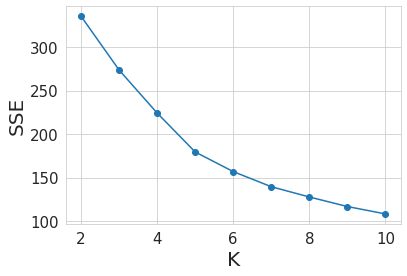

In [439]:
sse_list = list()
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters = k, n_init=10, max_iter=100, random_state=0)
    kmeans.fit(X_m)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
plt.plot(range(2, len(sse_list) + 2), sse_list,'-o')
plt.ylabel('SSE', fontsize=20)
plt.xlabel('K', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [440]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100, random_state=0)
kmeans.fit(X_m)

KMeans(max_iter=100, n_clusters=5, random_state=0)

In [441]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 4065, 1: 2576, 2: 934, 3: 593, 4: 1795}

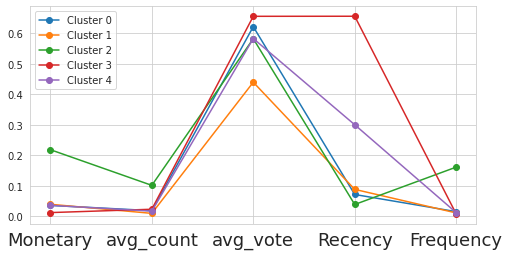

In [442]:
plt.figure(figsize=(8, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(actor_df_copy.columns)), actor_df_copy.columns, fontsize=18)
plt.legend(fontsize=10)
plt.show()

In [443]:
actor_df['K-Means_Labels'] = kmeans.labels_

In [444]:
actor_df.head()

actors      Monetary  ...  Frequency  K-Means_Labels
0       Tom Hanks  5.352381e+07  ...         42               2
1       Tim Allen  4.535294e+07  ...         17               2
2     Don Rickles  1.700000e+07  ...          2               4
3  Robin Williams  3.845854e+07  ...         41               2
4   Jonathan Hyde  6.500000e+07  ...          1               2

[5 rows x 7 columns]

In [445]:
actor_dic = actor_df[['actors','K-Means_Labels']].set_index('actors').to_dict()

In [446]:
df['labels'] = df['actors_tmdb'].apply(lambda values: list(map(lambda x: actor_dic['K-Means_Labels'][x], values)))

In [447]:
for label in range(len(kmeans.cluster_centers_)):
  df['actor_label_'+str(label)] = df['labels'].apply(
      lambda values: int(label in values)
  )

In [448]:
df = df.drop(['labels','actors_tmdb'],axis=1)

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8856 entries, 0 to 8855
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   belongs_to_collection     8856 non-null   int64  
 1   budget_tmdb               8856 non-null   float64
 2   id                        8856 non-null   int64  
 3   overview                  8852 non-null   object 
 4   popularity                8856 non-null   float64
 5   revenue                   8856 non-null   float64
 6   runtime                   8856 non-null   float64
 7   tagline                   6709 non-null   object 
 8   title_tmdb                8856 non-null   object 
 9   vote_average              8856 non-null   float64
 10  vote_count                8856 non-null   float64
 11  avg_vote                  8856 non-null   float64
 12  votes                     8856 non-null   float64
 13  keywords                  8856 non-null   object 
 14  year    

<a id='dr'></a>
### 2). DummyRegressor ([to top](#top))

In [450]:
df.to_csv('/content/drive/MyDrive/BDA/input/df.csv', index=False)

In [451]:
df = pd.read_csv('/content/drive/MyDrive/BDA/input/df.csv', keep_default_na=False)

In [452]:
return_df = df[df.columns.difference(['overview', 'tagline', 'title_tmdb','keywords', 'id', 'avg_vote', 'votes'])]

In [453]:
return_df.to_csv('/content/drive/MyDrive/BDA/input/return_df.csv', index=False)

In [454]:
return_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8856 entries, 0 to 8855
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Australia                 8856 non-null   int64  
 1   Canada                    8856 non-null   int64  
 2   China                     8856 non-null   int64  
 3   France                    8856 non-null   int64  
 4   Germany                   8856 non-null   int64  
 5   Hong Kong                 8856 non-null   int64  
 6   India                     8856 non-null   int64  
 7   Italy                     8856 non-null   int64  
 8   Japan                     8856 non-null   int64  
 9   N_spoken_languages        8856 non-null   int64  
 10  Russia                    8856 non-null   int64  
 11  South Korea               8856 non-null   int64  
 12  Spain                     8856 non-null   int64  
 13  United Kingdom            8856 non-null   int64  
 14  United S

In [455]:
X, y = return_df.drop(['revenue', 'return', 'return_log'], axis=1), return_df['return_log']

In [456]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.2, test_size=0.8, random_state=0)

In [457]:
dr = DummyRegressor()
dr.fit(train_X, train_y)

DummyRegressor()

In [458]:
test_predictions = dr.predict(test_X)
dr_results = {
    "RMSE" : np.sqrt(mean_squared_error(test_y, test_predictions)),
    "MAE" : mean_absolute_error(test_y, test_predictions),
    "R2" : dr.score(test_X, test_y)
}
print("Test RMSE : {:.4f}".format(dr_results['RMSE']))
print("Test MAE : {:.4f}".format(dr_results['MAE']))
print("Test R2 : {:.4f}".format(dr_results['R2']))

Test RMSE : 2.4573
Test MAE : 1.7107
Test R2 : -0.0001


<a id='dtr'></a>
### 3). DecisionTreeRegressor ([to top](#top))

In [459]:
X, y = return_df.drop(['revenue', 'return', 'return_log'], axis=1), return_df['return_log']

In [460]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.2, test_size=0.8, random_state=0)

In [461]:
X.shape, train_X.shape

((8856, 68), (1771, 68))

In [462]:
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(2, train_X.shape[1], 4):
  rfe = RFE(estimator=DecisionTreeRegressor(random_state = 0), n_features_to_select=i)
  model = DecisionTreeRegressor(random_state = 0)
  models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
 scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
 return scores

2 -0.338 (0.238)
6 -0.234 (0.266)
10 -0.230 (0.165)
14 -0.240 (0.186)
18 -0.240 (0.184)
22 -0.237 (0.194)
26 -0.258 (0.168)
30 -0.249 (0.167)
34 -0.260 (0.225)
38 -0.235 (0.187)
42 -0.262 (0.203)
46 -0.224 (0.186)
50 -0.229 (0.199)
54 -0.312 (0.246)
58 -0.258 (0.196)
62 -0.282 (0.239)
66 -0.261 (0.194)


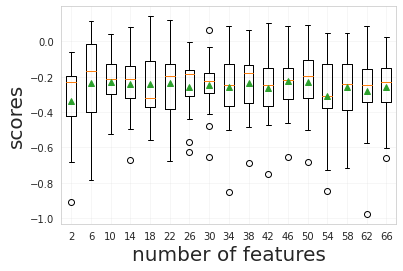

In [463]:
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, train_X, train_y)
 results.append(scores)
 names.append(name)
 print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('number of features', fontsize=20)
plt.ylabel('scores', fontsize=20)
plt.grid(alpha=0.2)
plt.show()

In [464]:
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(random_state = 0), n_features_to_select=46)
# let's create a pipeline
model = DecisionTreeRegressor(random_state = 0)
# create a pipeline
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

In [465]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)
# evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
n_scores = cross_val_score(model, train_X, train_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('r2_score for cv: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

r2_score for cv: -0.209 (0.093)


In [466]:
pipeline.fit(train_X, train_y)
scores = pipeline.score(test_X, test_y)
# report performance
print('r2_score for testset: %.3f (%.3f)' % (mean(scores), std(scores)))

r2_score for testset: -0.089 (0.000)


In [467]:
# summarize all features
for i in range(train_X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 11.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 15.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 9.000
Column: 8, Selected False, Rank: 16.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected False, Rank: 18.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected False, Rank: 4.000
Column: 25, Selected True

In [468]:
train_X, test_X = train_X.loc[:, rfe.support_], test_X.loc[:, rfe.support_]

In [469]:
dtr_rfe = rfe

In [470]:
params = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
          'splitter' : ['best', 'random'],
          'max_depth' : [2, 5, 10, 15, 20, 25, None],
          'min_samples_split' : [100, 150, 200],
          'min_samples_leaf': [2, 5, 10, 15, 20, 25]}

grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),params,verbose=1,cv=5,scoring='r2',n_jobs=-1)
grid_search_cv.fit(train_X,train_y)

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 5, 10, 15, 20, 25, None],
                         'min_samples_leaf': [2, 5, 10, 15, 20, 25],
                         'min_samples_split': [100, 150, 200],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=1)

In [471]:
grid_search_cv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 15,
 'min_samples_leaf': 10,
 'min_samples_split': 150,
 'splitter': 'best'}

In [472]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=15,
                      min_samples_leaf=10, min_samples_split=150,
                      random_state=0)

In [473]:
dtr = grid_search_cv.best_estimator_
#dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=15, min_samples_leaf=10, min_samples_split=150, random_state=0)
#dtr.fit(train_X,train_y)

In [474]:
print("Train RMSE : {:.4f}".format(np.sqrt(mean_squared_error(train_y, dtr.predict(train_X)))))
print("Train MAE : {:.4f}".format(mean_absolute_error(train_y, dtr.predict(train_X))))
print("Train R2 score:", dtr.score(train_X, train_y))

Train RMSE : 1.8264
Train MAE : 1.2265
Train R2 score: 0.42678871910784744


In [475]:
test_predictions = dtr.predict(test_X)
dtr_results = {
    "RMSE" : np.sqrt(mean_squared_error(test_y, test_predictions)),
    "MAE" : mean_absolute_error(test_y, test_predictions),
    "R2" : dtr.score(test_X, test_y)
}
print("Test RMSE : {:.4f}".format(dtr_results['RMSE']))
print("Test MAE : {:.4f}".format(dtr_results['MAE']))
print("Test R2 : {:.4f}".format(dtr_results['R2']))

Test RMSE : 1.9908
Test MAE : 1.3494
Test R2 : 0.3725


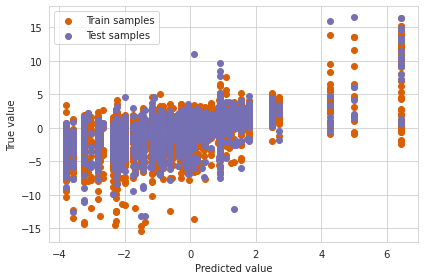

In [476]:
train_predictions = dtr.predict(train_X)
test_predictions = dtr.predict(test_X)
plt.scatter(train_predictions, train_y, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_y, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.tight_layout()
plt.show()

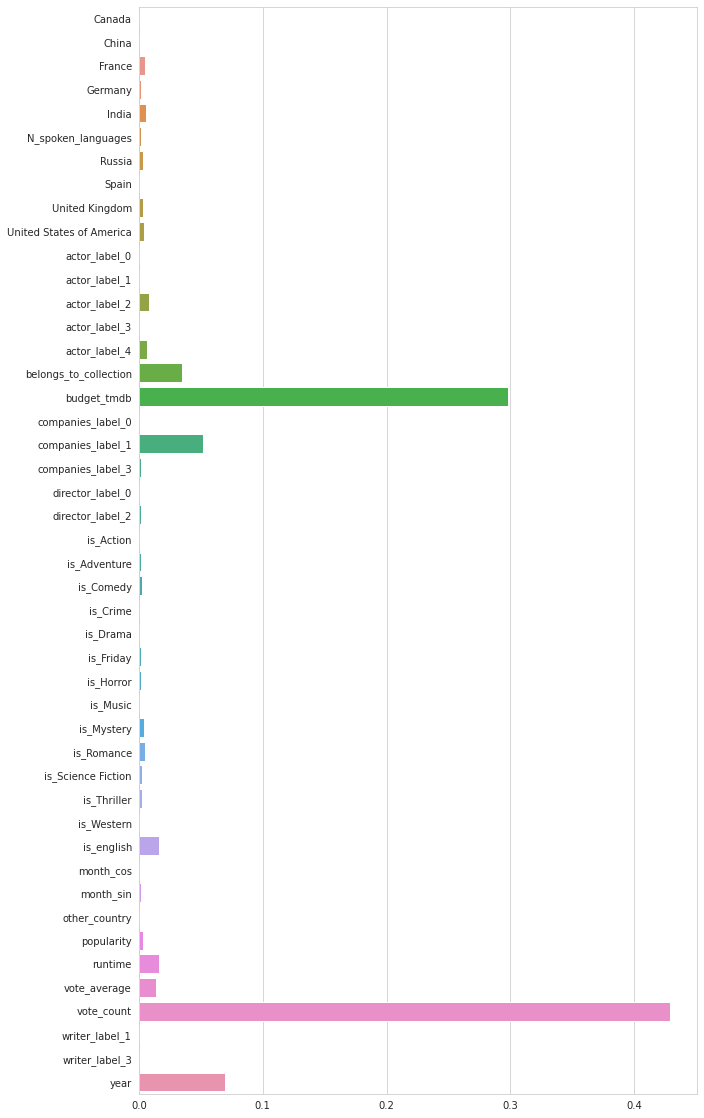

In [477]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,20))
sns.barplot(x=dtr.feature_importances_, y=train_X.columns)

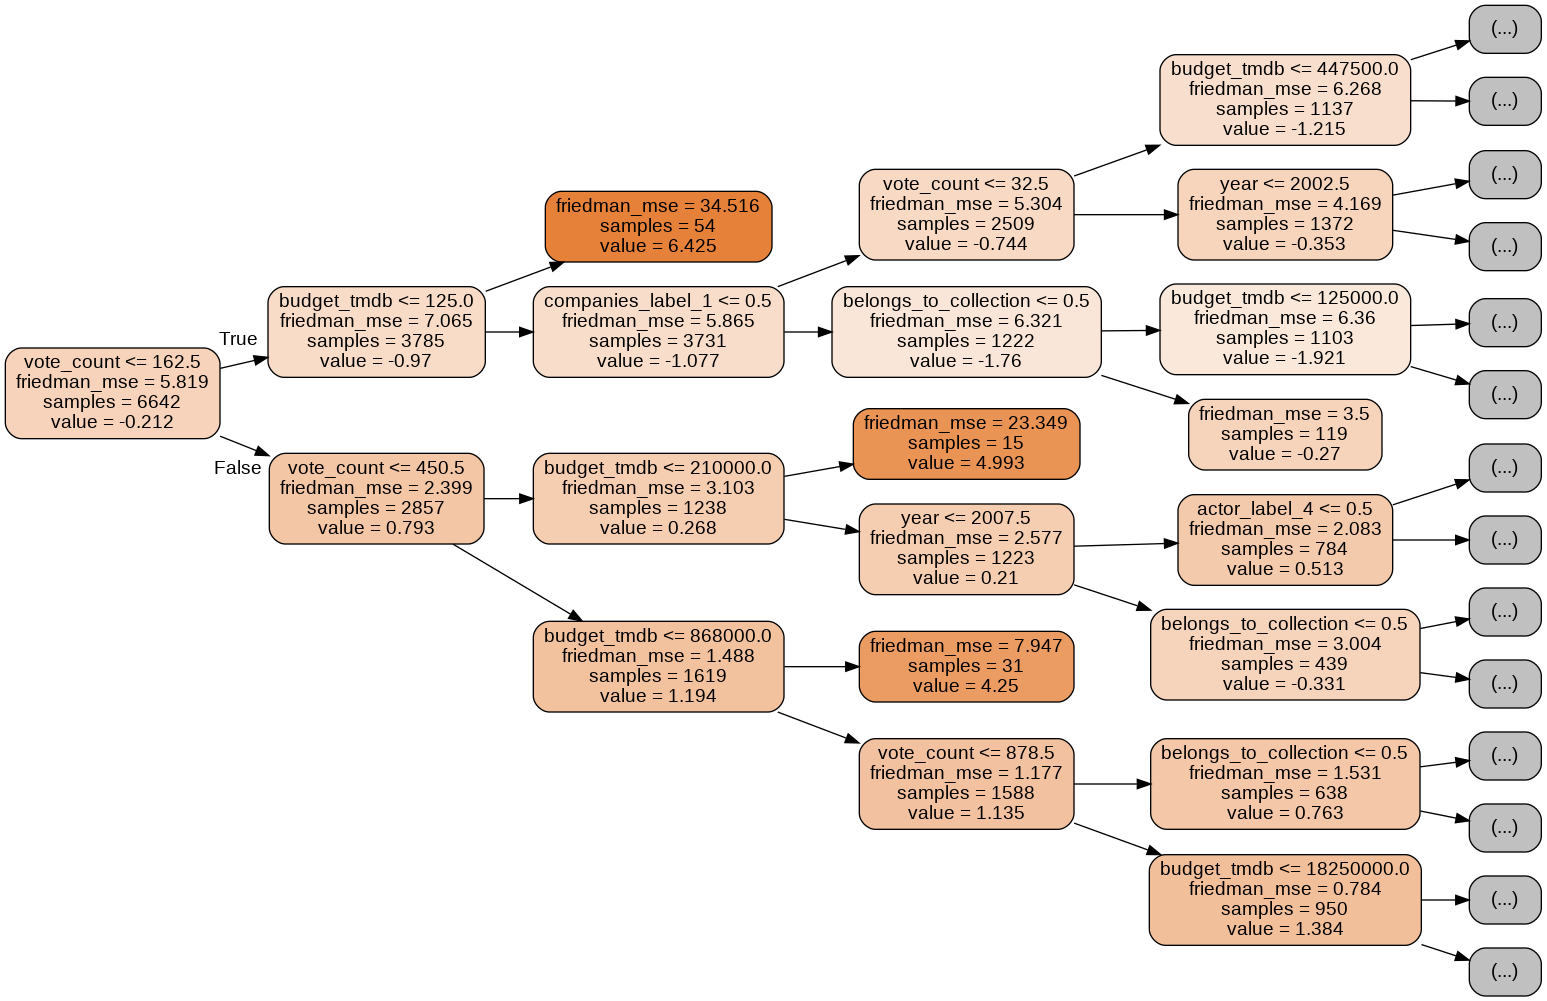

In [478]:
# visualize the actual decision tree obtained 
dot_data = export_graphviz(dtr,
               out_file=None,
               max_depth=4, 
               feature_names=list(train_X.columns),  
               filled=True,
               rotate=True,
               rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<a id='mlpr'></a>
### 4). MLPRegressor ([to top](#top))

In [479]:
X, y = return_df.drop(['revenue', 'return', 'return_log'], axis=1), return_df['return_log']
data = X
data.insert(len(data.columns), 'return_log', y)
data.columns, data.shape

(Index(['Australia', 'Canada', 'China', 'France', 'Germany', 'Hong Kong',
        'India', 'Italy', 'Japan', 'N_spoken_languages', 'Russia',
        'South Korea', 'Spain', 'United Kingdom', 'United States of America',
        'actor_label_0', 'actor_label_1', 'actor_label_2', 'actor_label_3',
        'actor_label_4', 'belongs_to_collection', 'budget_tmdb',
        'companies_label_0', 'companies_label_1', 'companies_label_2',
        'companies_label_3', 'director_label_0', 'director_label_1',
        'director_label_2', 'director_label_3', 'is_Action', 'is_Adventure',
        'is_Animation', 'is_Biography', 'is_Comedy', 'is_Crime',
        'is_Documentary', 'is_Drama', 'is_Family', 'is_Fantasy', 'is_Foreign',
        'is_Friday', 'is_History', 'is_Horror', 'is_Music', 'is_Musical',
        'is_Mystery', 'is_Romance', 'is_Science Fiction', 'is_Sport',
        'is_TV Movie', 'is_Thriller', 'is_War', 'is_Western', 'is_english',
        'month_cos', 'month_sin', 'other_country', 'popular

In [480]:
scaler_m = MinMaxScaler()
data_m = scaler_m.fit_transform(data.values)
X_m = data_m[:, 0:len(data.columns)-1]
y_m = data_m[:,len(data.columns)-1]

In [481]:
train_X, test_X, train_y, test_y = train_test_split(X_m, y_m, train_size=0.75, test_size=0.25, random_state=0)
model = MLPRegressor(random_state = 0, early_stopping=True, max_iter=1000)

In [482]:
# evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
n_scores = cross_val_score(model, train_X, train_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('r2_score for cv: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

r2_score for cv: -0.010 (0.036)


In [483]:
model.fit(train_X, train_y)
scores = model.score(test_X, test_y)
# report performance
print('r2_score for testset: %.3f (%.3f)' % (mean(scores), std(scores)))

r2_score for testset: -0.029 (0.000)


In [484]:
params = {"hidden_layer_sizes": [(1,),(2,),(3,)],
          "activation": ["identity", "logistic", "tanh", "relu"],
          "solver": ["lbfgs", "sgd", "adam"],
          "alpha": [0.001,0.005,0.01]}

grid_search_cv = GridSearchCV(model,params,verbose=1,cv=5,scoring='r2',n_jobs=-1)
grid_search_cv.fit(train_X,train_y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=MLPRegressor(early_stopping=True, max_iter=1000,
                                    random_state=0),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.001, 0.005, 0.01],
                         'hidden_layer_sizes': [(1,), (2,), (3,)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='r2', verbose=1)

In [485]:
grid_search_cv.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'hidden_layer_sizes': (3,),
 'solver': 'adam'}

In [486]:
grid_search_cv.best_estimator_

MLPRegressor(activation='tanh', alpha=0.001, early_stopping=True,
             hidden_layer_sizes=(3,), max_iter=1000, random_state=0)

In [487]:
mlpr = grid_search_cv.best_estimator_
#mlpr = MLPRegressor(activation='tanh', alpha=0.001, early_stopping=True, hidden_layer_sizes=(3,), max_iter=1000, random_state=0)
#mlpr.fit(train_X,train_y)

In [488]:
print("Train RMSE : {:.4f}".format(np.sqrt(mean_squared_error(scaler_m.inverse_transform(np.column_stack([train_X, train_y]))[:,-1],
                                           scaler_m.inverse_transform(np.column_stack([train_X,mlpr.predict(train_X)]))[:,-1]))))
print("Train MAE : {:.4f}".format(mean_absolute_error(scaler_m.inverse_transform(np.column_stack([train_X, train_y]))[:,-1],
                                                      scaler_m.inverse_transform(np.column_stack([train_X,mlpr.predict(train_X)]))[:,-1])))
print("Train R2 score:", mlpr.score(train_X, train_y))

Train RMSE : 2.1109
Train MAE : 1.4155
Train R2 score: 0.2342896492271762


In [489]:
test_predictions = mlpr.predict(test_X)
mlpr_results = {
    "RMSE" : np.sqrt(mean_squared_error(scaler_m.inverse_transform(np.column_stack([test_X, test_y]))[:,-1]
                                        , scaler_m.inverse_transform(np.column_stack([test_X,test_predictions]))[:,-1])),
    "MAE" : mean_absolute_error(scaler_m.inverse_transform(np.column_stack([test_X, test_y]))[:,-1]
                                        , scaler_m.inverse_transform(np.column_stack([test_X,test_predictions]))[:,-1]),
    "R2" : mlpr.score(test_X, test_y)
}
print("Test RMSE : {:.4f}".format(mlpr_results['RMSE']))
print("Test MAE : {:.4f}".format(mlpr_results['MAE']))
print("Test R2 : {:.4f}".format(mlpr_results['R2']))

Test RMSE : 2.2880
Test MAE : 1.4836
Test R2 : 0.1712


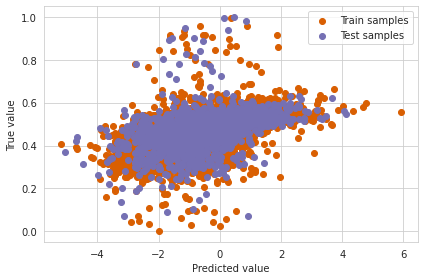

In [490]:
train_predictions = scaler_m.inverse_transform(np.column_stack([train_X,mlpr.predict(train_X)]))[:,-1]
test_predictions = scaler_m.inverse_transform(np.column_stack([test_X,mlpr.predict(test_X)]))[:,-1]
plt.scatter(train_predictions, train_y, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_y, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.tight_layout()
plt.show()

In [491]:
mlpr_bagging = BaggingRegressor(base_estimator=mlpr, n_estimators=50, random_state=0).fit(train_X,train_y)

In [492]:
print("Train RMSE : {:.4f}".format(np.sqrt(mean_squared_error(scaler_m.inverse_transform(np.column_stack([train_X, train_y]))[:,-1],
                                           scaler_m.inverse_transform(np.column_stack([train_X,mlpr_bagging.predict(train_X)]))[:,-1]))))
print("Train MAE : {:.4f}".format(mean_absolute_error(scaler_m.inverse_transform(np.column_stack([train_X, train_y]))[:,-1],
                                                      scaler_m.inverse_transform(np.column_stack([train_X,mlpr_bagging.predict(train_X)]))[:,-1])))
print("Train R2 score:", mlpr_bagging.score(train_X, train_y))

Train RMSE : 2.0464
Train MAE : 1.3296
Train R2 score: 0.28036208445172883


In [493]:
test_predictions = mlpr_bagging.predict(test_X)
mlpr_bagging_results = {
    "RMSE" : np.sqrt(mean_squared_error(scaler_m.inverse_transform(np.column_stack([test_X, test_y]))[:,-1]
                                        , scaler_m.inverse_transform(np.column_stack([test_X,test_predictions]))[:,-1])),
    "MAE" : mean_absolute_error(scaler_m.inverse_transform(np.column_stack([test_X, test_y]))[:,-1]
                                        , scaler_m.inverse_transform(np.column_stack([test_X,test_predictions]))[:,-1]),
    "R2" : mlpr.score(test_X, test_y)
}
print("Test RMSE : {:.4f}".format(mlpr_bagging_results['RMSE']))
print("Test MAE : {:.4f}".format(mlpr_bagging_results['MAE']))
print("Test R2 : {:.4f}".format(mlpr_bagging_results['R2']))

Test RMSE : 2.2379
Test MAE : 1.4136
Test R2 : 0.1712


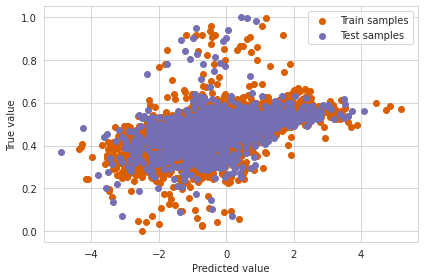

In [494]:
train_predictions = scaler_m.inverse_transform(np.column_stack([train_X,mlpr_bagging.predict(train_X)]))[:,-1]
test_predictions = scaler_m.inverse_transform(np.column_stack([test_X,mlpr_bagging.predict(test_X)]))[:,-1]
plt.scatter(train_predictions, train_y, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_y, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.tight_layout()
plt.show()

<a id='cnn-svr'></a>
### 5). CNN-SVR/XGBoost ([to top](#top))

In [495]:
X, y = return_df.drop(['revenue', 'return', 'return_log'], axis=1), return_df['return_log']

In [496]:
data = X
data.insert(len(data.columns), 'return_log', y)
data.columns, data.shape

(Index(['Australia', 'Canada', 'China', 'France', 'Germany', 'Hong Kong',
        'India', 'Italy', 'Japan', 'N_spoken_languages', 'Russia',
        'South Korea', 'Spain', 'United Kingdom', 'United States of America',
        'actor_label_0', 'actor_label_1', 'actor_label_2', 'actor_label_3',
        'actor_label_4', 'belongs_to_collection', 'budget_tmdb',
        'companies_label_0', 'companies_label_1', 'companies_label_2',
        'companies_label_3', 'director_label_0', 'director_label_1',
        'director_label_2', 'director_label_3', 'is_Action', 'is_Adventure',
        'is_Animation', 'is_Biography', 'is_Comedy', 'is_Crime',
        'is_Documentary', 'is_Drama', 'is_Family', 'is_Fantasy', 'is_Foreign',
        'is_Friday', 'is_History', 'is_Horror', 'is_Music', 'is_Musical',
        'is_Mystery', 'is_Romance', 'is_Science Fiction', 'is_Sport',
        'is_TV Movie', 'is_Thriller', 'is_War', 'is_Western', 'is_english',
        'month_cos', 'month_sin', 'other_country', 'popular

In [497]:
scaler_m = MinMaxScaler()
data_m = scaler_m.fit_transform(data.values)
X_m = data_m[:, 0:len(data.columns)-1]
y_m = data_m[:,len(data.columns)-1]

In [498]:
train_X, test_X, train_y, test_y = train_test_split(X_m, y_m, train_size=0.75, test_size=0.25, random_state=0)
train_X.shape, test_X.shape

((6642, 68), (2214, 68))

In [499]:
x_train = np.expand_dims(train_X, axis=2)
x_test = np.expand_dims(test_X, axis=2)
x_train.shape, x_test.shape

((6642, 68, 1), (2214, 68, 1))

In [500]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, BatchNormalization, MaxPooling1D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import model_from_json
from tensorflow.keras import backend as K
tf.random.set_seed(42)

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model = Sequential()
model.add(Conv1D(128, (5), dilation_rate=3, input_shape=(train_X.shape[1],1), activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu', name='output_2'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear', name='output_1'))

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=[r2_keras])

model.summary()

history = model.fit(x_train, train_y,
          batch_size=32,
          epochs=200,
          verbose=2,
          validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 56, 128)           768       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 28, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 128)           512       
_________________________________________________________________
flatten_1 (Flatten)          (None, 3584)              0         
_________________________________________________________________
output_2 (Dense)             (None, 64)                229440    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [501]:
cnnr = model

In [502]:
train_predictions = scaler_m.inverse_transform(np.column_stack([train_X,np.squeeze(model.predict(x_train))]))[:,-1]
print("Train RMSE : {:.4f}".format(np.sqrt(mean_squared_error(train_y, train_predictions))))
print("Train MAE : {:.4f}".format(mean_absolute_error(train_y, train_predictions)))
print("Train R2 score : {:.4f}".format(model.evaluate(x_train, train_y, verbose=0)[1]))

Train RMSE : 1.4894
Train MAE : 1.0878
Train R2 score : 0.5464


In [503]:
test_predictions = scaler_m.inverse_transform(np.column_stack([test_X,np.squeeze(cnnr.predict(x_test))]))[:,-1]
cnnr_results = {
    "RMSE" : np.sqrt(mean_squared_error(test_y, test_predictions)),
    "MAE" : mean_absolute_error(test_y, test_predictions),
    "R2" : cnnr.evaluate(x_test, test_y, verbose=0)[1]
}
print("Test RMSE : {:.4f}".format(cnnr_results['RMSE']))
print("Test MAE : {:.4f}".format(cnnr_results['MAE']))
print("Test R2 : {:.4f}".format(cnnr_results['R2']))

Test RMSE : 1.3930
Test MAE : 1.0722
Test R2 : 0.2322


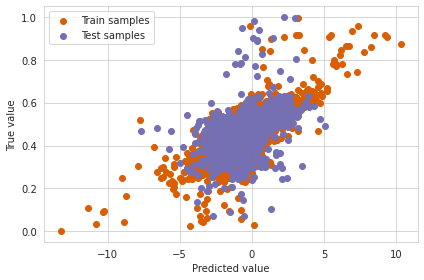

In [504]:
plt.scatter(train_predictions, train_y, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_y, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.tight_layout()
plt.show()

In [505]:
from tensorflow.keras.models import Model

rm1 = Model(inputs=cnnr.input, outputs=cnnr.get_layer('output_1').output)
rm2 = Model(inputs=cnnr.input, outputs=cnnr.get_layer('output_2').output)

In [509]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(rm2.predict(x_train), train_y)
scores = svr.score(rm2.predict(x_test),test_y)
print('R2 score for CNN-SVC-2: %.3f (%.3f)' % (mean(scores), std(scores)))

R2 score for CNN-SVC-2: 0.136 (0.000)


In [510]:
svr = SVR()
svr.fit(rm1.predict(x_train), train_y)
scores = svr.score(rm1.predict(x_test),test_y)
print('R2 score for CNN-SVC-1: %.3f (%.3f)' % (mean(scores), std(scores)))

R2 score for CNN-SVC-1: 0.154 (0.000)


In [511]:
xbr = xgb.XGBRegressor(random_state=0)
xbr.fit(rm1.predict(x_train), train_y)
scores = xbr.score(rm1.predict(x_test),test_y)
print('R2 score for CNN-XGBoost-1: %.3f (%.3f)' % (mean(scores), std(scores)))

[13:59:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for CNN-XGBoost-1: 0.210 (0.000)


In [512]:
xbr = xgb.XGBRegressor(random_state=0)
xbr.fit(rm2.predict(x_train), train_y)
scores = xbr.score(rm2.predict(x_test),test_y)
print('R2 score for CNN-XGBoost-2: %.3f (%.3f)' % (mean(scores), std(scores)))

[13:59:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score for CNN-XGBoost-2: 0.241 (0.000)


**CNN-XGBoost-2 :**

In [513]:
train_predictions = scaler_m.inverse_transform(np.column_stack([train_X,xbr.predict(rm2.predict(x_train))]))[:,-1]
print("Train RMSE : {:.4f}".format(np.sqrt(mean_squared_error(train_y, train_predictions))))
print("Train MAE : {:.4f}".format(mean_absolute_error(train_y, train_predictions)))
print("Train R2 score : {:.4f}".format(xbr.score(rm2.predict(x_train), train_y)))

Train RMSE : 1.8935
Train MAE : 1.3323
Train R2 score : 0.6529


In [514]:
test_predictions = scaler_m.inverse_transform(np.column_stack([test_X, xbr.predict(rm2.predict(x_test))]))[:,-1]
cxr_results = {
    "RMSE" : np.sqrt(mean_squared_error(test_y, test_predictions)),
    "MAE" : mean_absolute_error(test_y, test_predictions),
    "R2" : xbr.score(rm2.predict(x_test), test_y)
}
print("Test RMSE : {:.4f}".format(cxr_results['RMSE']))
print("Test MAE : {:.4f}".format(cxr_results['MAE']))
print("Test R2 : {:.4f}".format(cxr_results['R2']))

Test RMSE : 1.7276
Test MAE : 1.2938
Test R2 : 0.2413


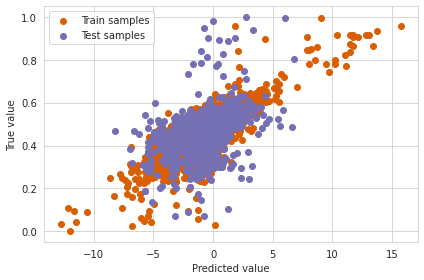

In [515]:
plt.scatter(train_predictions, train_y, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_y, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.tight_layout()
plt.show()

<a id='rfr'></a>
### 6). RandomForestRegressor ([to top](#top))

In [516]:
X, y = return_df.drop(['revenue', 'return', 'return_log'], axis=1), return_df['return_log']

In [517]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.2, test_size=0.8, random_state=0)

In [518]:
X.shape, train_X.shape

((8856, 68), (1771, 68))

In [519]:
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(14, train_X.shape[1], 10):
  rfe = RFE(estimator=RandomForestRegressor(random_state = 0), n_features_to_select=i)
  model = RandomForestRegressor(random_state = 0)
  models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
 scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
 return scores

14 0.343 (0.064)
24 0.359 (0.069)
34 0.366 (0.069)
44 0.364 (0.067)
54 0.367 (0.063)
64 0.366 (0.065)


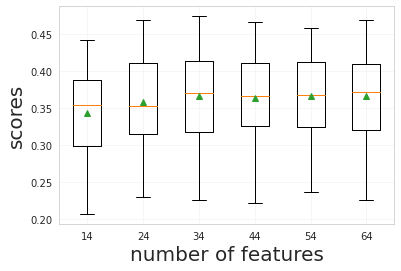

In [520]:
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, train_X, train_y)
 results.append(scores)
 names.append(name)
 print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('number of features', fontsize=20)
plt.ylabel('scores', fontsize=20)
plt.grid(alpha=0.2)
plt.show()

In [521]:
# create pipeline
rfe = RFE(estimator=RandomForestRegressor(random_state = 0), n_features_to_select=34)
# let's create a pipeline
model = RandomForestRegressor(random_state = 0)
# create a pipeline
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

In [522]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)
# evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
n_scores = cross_val_score(model, train_X, train_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('r2_score for cv: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

r2_score for cv: 0.408 (0.024)


In [523]:
pipeline.fit(train_X, train_y)
scores = pipeline.score(test_X, test_y)
# report performance
print('r2_score for testset: %.3f (%.3f)' % (mean(scores), std(scores)))

r2_score for testset: 0.479 (0.000)


In [524]:
# summarize all features
for i in range(train_X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 17.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 29.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 30.000
Column: 6, Selected False, Rank: 18.000
Column: 7, Selected False, Rank: 22.000
Column: 8, Selected False, Rank: 27.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 7.000
Column: 11, Selected False, Rank: 12.000
Column: 12, Selected False, Rank: 25.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 16.000
Column: 19, Selected False, Rank: 5.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected False, Rank: 19.000
Column: 25, S

In [525]:
train_X, test_X = train_X.loc[:, rfe.support_], test_X.loc[:, rfe.support_]

In [526]:
rfr_rfe = rfe

In [527]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 600, num = 2)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5]
#define the model
reg = RandomForestRegressor(random_state = 0)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#define the grid search
grid_search_cv = RandomizedSearchCV(estimator = reg, 
                                    param_distributions = random_grid, 
                                    n_iter = 50, 
                                    cv = 5, 
                                    verbose=2, 
                                    random_state=0, 
                                    n_jobs = -1)
#run the grid search
grid_search_cv.fit(train_X, train_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [2, 5],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [500, 600]},
                   random_state=0, verbose=2)

In [528]:
grid_search_cv.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 500}

In [529]:
grid_search_cv.best_estimator_

RandomForestRegressor(min_samples_leaf=5, n_estimators=500, random_state=0)

In [530]:
rfr = grid_search_cv.best_estimator_
#rfr = RandomForestRegressor(min_samples_leaf=5, n_estimators=500, random_state=0)
#rfr.fit(train_X, train_y)

In [531]:
print("Train RMSE : {:.4f}".format(np.sqrt(mean_squared_error(train_y, rfr.predict(train_X)))))
print("Train MAE : {:.4f}".format(mean_absolute_error(train_y, rfr.predict(train_X))))
print("Train R2 score:", rfr.score(train_X, train_y))

Train RMSE : 1.2460
Train MAE : 0.7790
Train R2 score: 0.7332312226242721


In [532]:
test_predictions = rfr.predict(test_X)
rfr_results = {
    "RMSE" : np.sqrt(mean_squared_error(test_y, test_predictions)),
    "MAE" : mean_absolute_error(test_y, test_predictions),
    "R2" : rfr.score(test_X, test_y)
}
print("Test RMSE : {:.4f}".format(rfr_results['RMSE']))
print("Test MAE : {:.4f}".format(rfr_results['MAE']))
print("Test R2 : {:.4f}".format(rfr_results['R2']))

Test RMSE : 1.8107
Test MAE : 1.2238
Test R2 : 0.4809


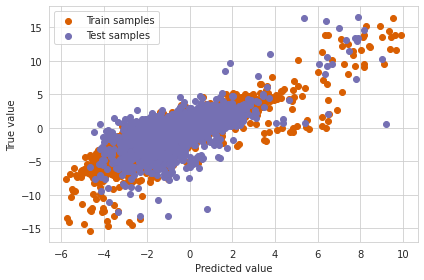

In [533]:
train_predictions = rfr.predict(train_X)
test_predictions = rfr.predict(test_X)
plt.scatter(train_predictions, train_y, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_y, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.tight_layout()
plt.show()

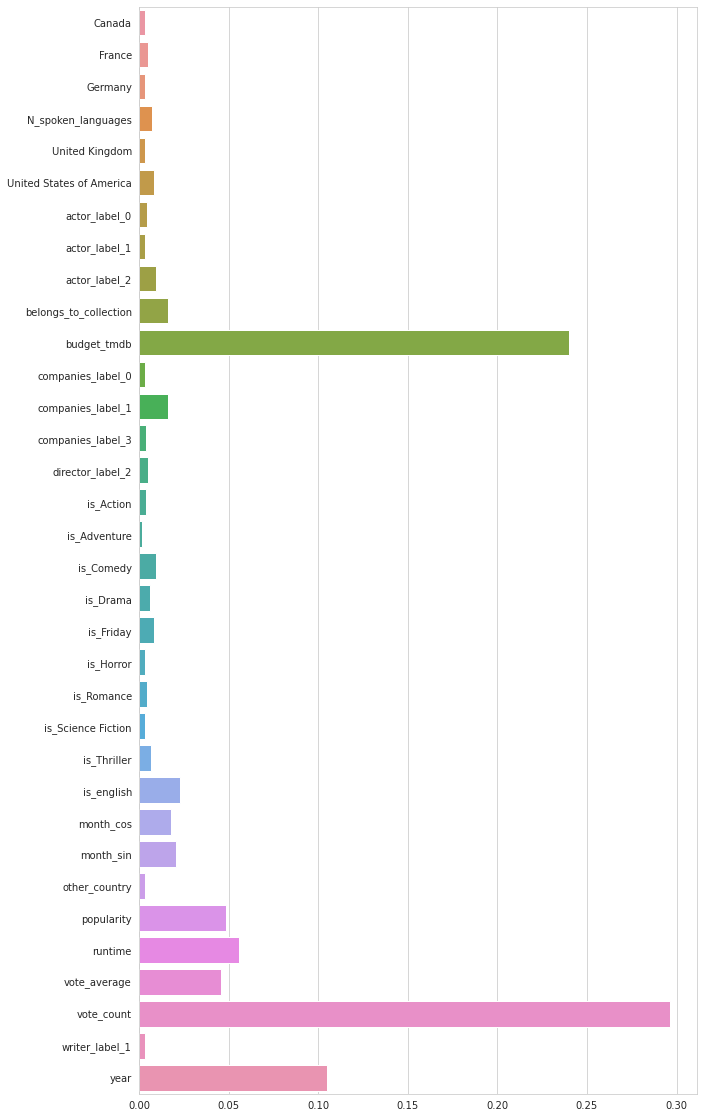

In [534]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,20))
sns.barplot(x=rfr.feature_importances_, y=train_X.columns)

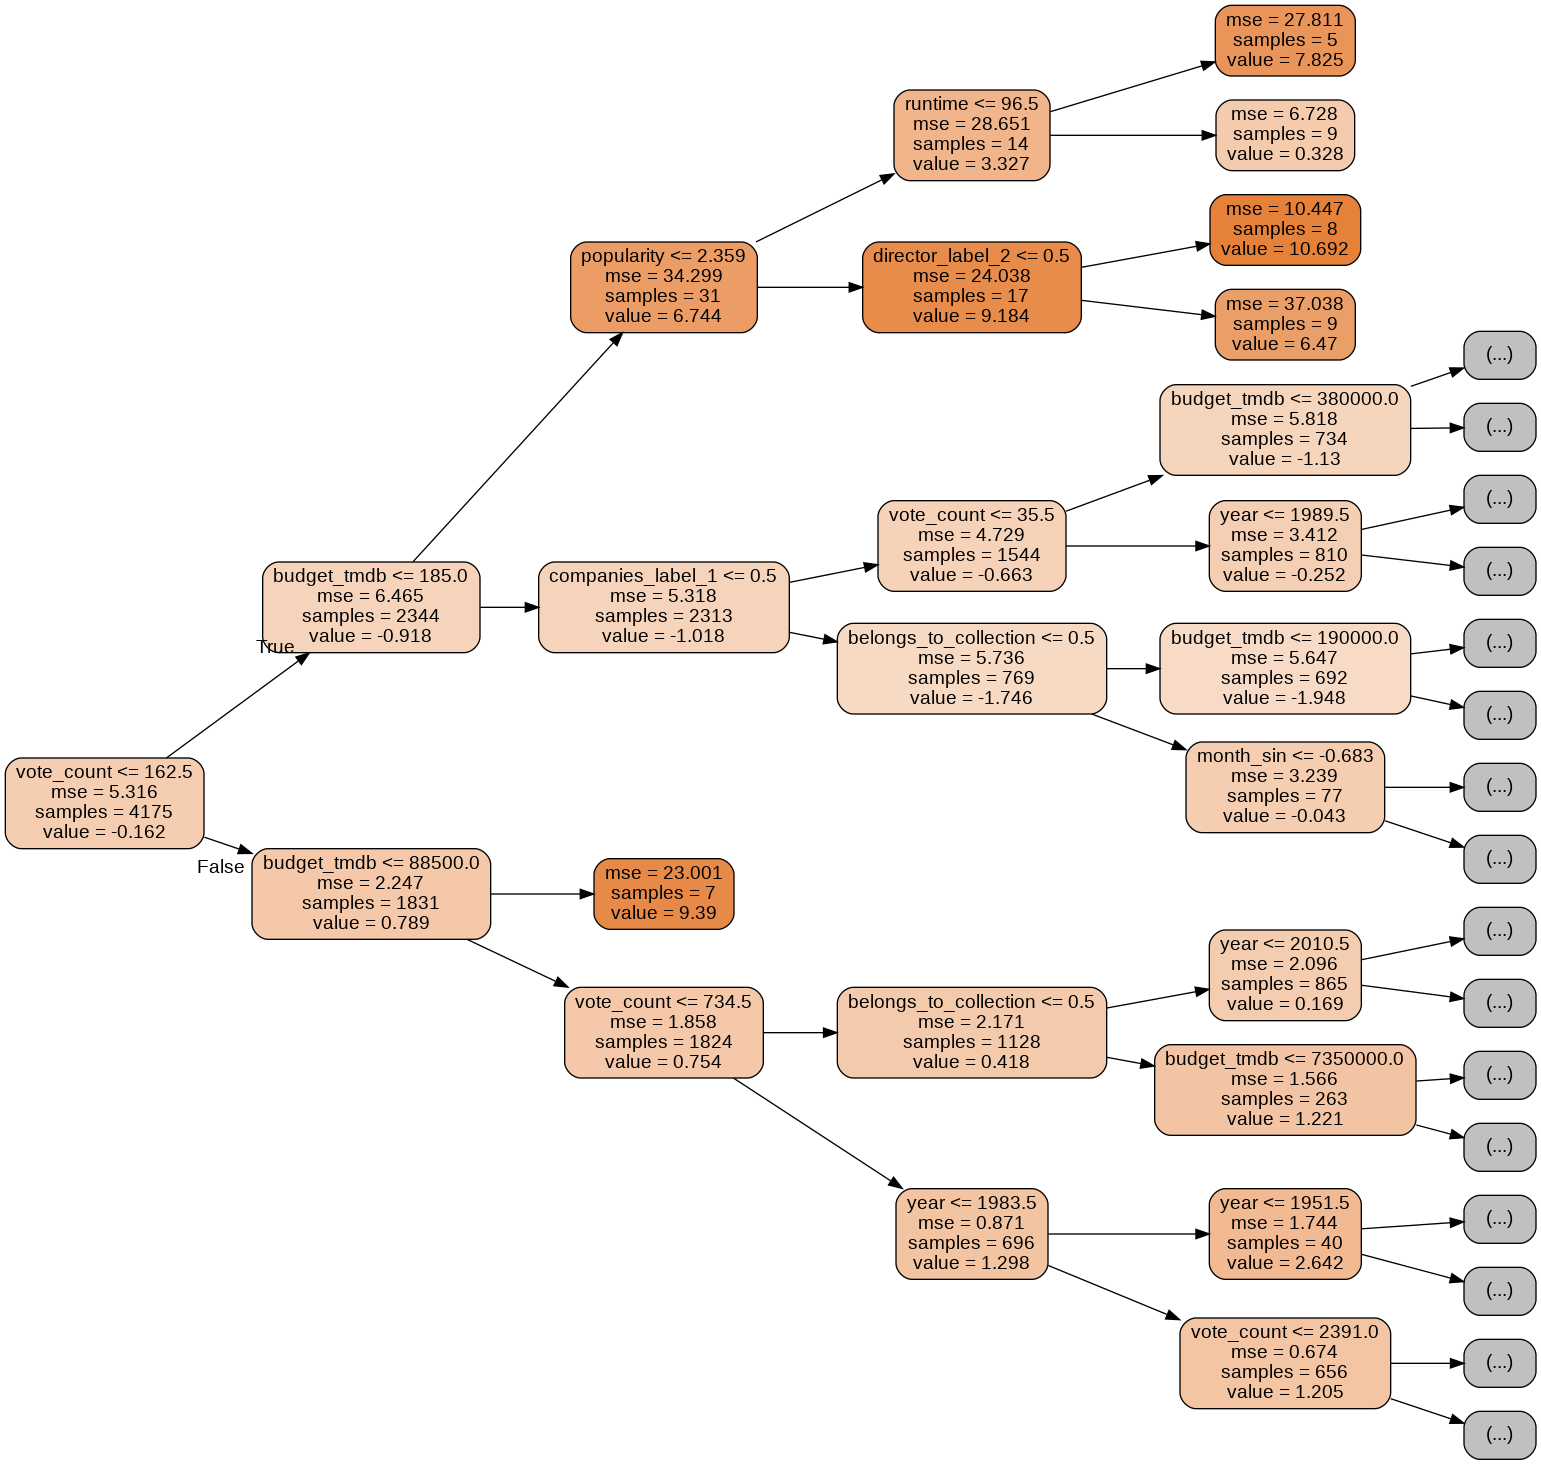

In [535]:
# visualize the actual decision tree obtained 
dot_data = export_graphviz(rfr.estimators_[0],
               out_file=None,
               max_depth=4, 
               feature_names=list(train_X.columns),  
               filled=True,
               rotate=True,
               rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<a id='gbr'></a>
### 7). GradientBoostingRegressor ([to top](#top))

In [536]:
X, y = return_df.drop(['revenue', 'return', 'return_log'], axis=1), return_df['return_log']

In [537]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.2, test_size=0.8, random_state=0)

In [538]:
X.shape, train_X.shape

((8856, 68), (1771, 68))

In [539]:
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(20, train_X.shape[1], 10):
  rfe = RFE(estimator=GradientBoostingRegressor(random_state = 0), n_features_to_select=i)
  model = GradientBoostingRegressor(random_state = 0)
  models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
 scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
 return scores

20 0.329 (0.061)
30 0.335 (0.057)
40 0.331 (0.062)
50 0.330 (0.063)
60 0.330 (0.063)


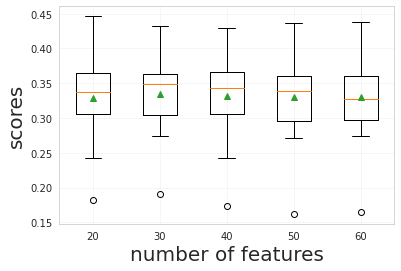

In [540]:
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, train_X, train_y)
 results.append(scores)
 names.append(name)
 print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('number of features', fontsize=20)
plt.ylabel('scores', fontsize=20)
plt.grid(alpha=0.2)
plt.show()

In [541]:
# create pipeline
rfe = RFE(estimator=GradientBoostingRegressor(random_state = 0), n_features_to_select=30)
# let's create a pipeline
model = GradientBoostingRegressor(random_state = 0)
# create a pipeline
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

In [542]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)
# evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
n_scores = cross_val_score(model, train_X, train_y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('r2_score for cv: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

r2_score for cv: 0.407 (0.026)


In [543]:
pipeline.fit(train_X, train_y)
scores = pipeline.score(test_X, test_y)
# report performance
print('r2_score for testset: %.3f (%.3f)' % (mean(scores), std(scores)))

r2_score for testset: 0.469 (0.000)


In [544]:
# summarize all features
for i in range(train_X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 39.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 15.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 4.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 13.000
Column: 8, Selected False, Rank: 23.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 10.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 5.000
Column: 16, Selected False, Rank: 7.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 22.000
Column: 19, Selected False, Rank: 25.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected False, Rank: 31.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected False, Rank: 20.000
Column: 25, Se

In [545]:
train_X, test_X = train_X.loc[:, rfe.support_], test_X.loc[:, rfe.support_]

In [546]:
gbr_rfe = rfe

In [547]:
params = {'learning_rate': [0.01,0.001],
          'subsample'    : [0.9, 0.5],
          'n_estimators' : [500, 1000],
          'max_depth'    : [6,8]}

grid_search_cv = GridSearchCV(GradientBoostingRegressor(random_state=0),params,verbose=1,cv=5,scoring='r2',n_jobs=-1)
grid_search_cv.fit(train_X,train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.001], 'max_depth': [6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.9, 0.5]},
             scoring='r2', verbose=1)

In [548]:
grid_search_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.5}

In [549]:
grid_search_cv.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=500,
                          random_state=0, subsample=0.5)

In [550]:
gbr = grid_search_cv.best_estimator_
#gbr = GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=500, random_state=0, subsample=0.5)
#gbr.fit(train_X,train_y)

In [551]:
print("Train RMSE : {:.4f}".format(np.sqrt(mean_squared_error(train_y, gbr.predict(train_X)))))
print("Train MAE : {:.4f}".format(mean_absolute_error(train_y, gbr.predict(train_X))))
print("Train R2 score:", gbr.score(train_X, train_y))

Train RMSE : 1.4037
Train MAE : 0.9790
Train R2 score: 0.6614105101067757


In [552]:
test_predictions = gbr.predict(test_X)
gbr_results = {
    "RMSE" : np.sqrt(mean_squared_error(test_y, test_predictions)),
    "MAE" : mean_absolute_error(test_y, test_predictions),
    "R2" : gbr.score(test_X, test_y)
}
print("Test RMSE : {:.4f}".format(gbr_results['RMSE']))
print("Test MAE : {:.4f}".format(gbr_results['MAE']))
print("Test R2 : {:.4f}".format(gbr_results['R2']))

Test RMSE : 1.8106
Test MAE : 1.2204
Test R2 : 0.4809


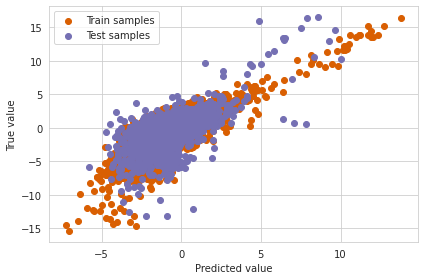

In [553]:
train_predictions = gbr.predict(train_X)
test_predictions = gbr.predict(test_X)
plt.scatter(train_predictions, train_y, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_y, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.tight_layout()
plt.show()

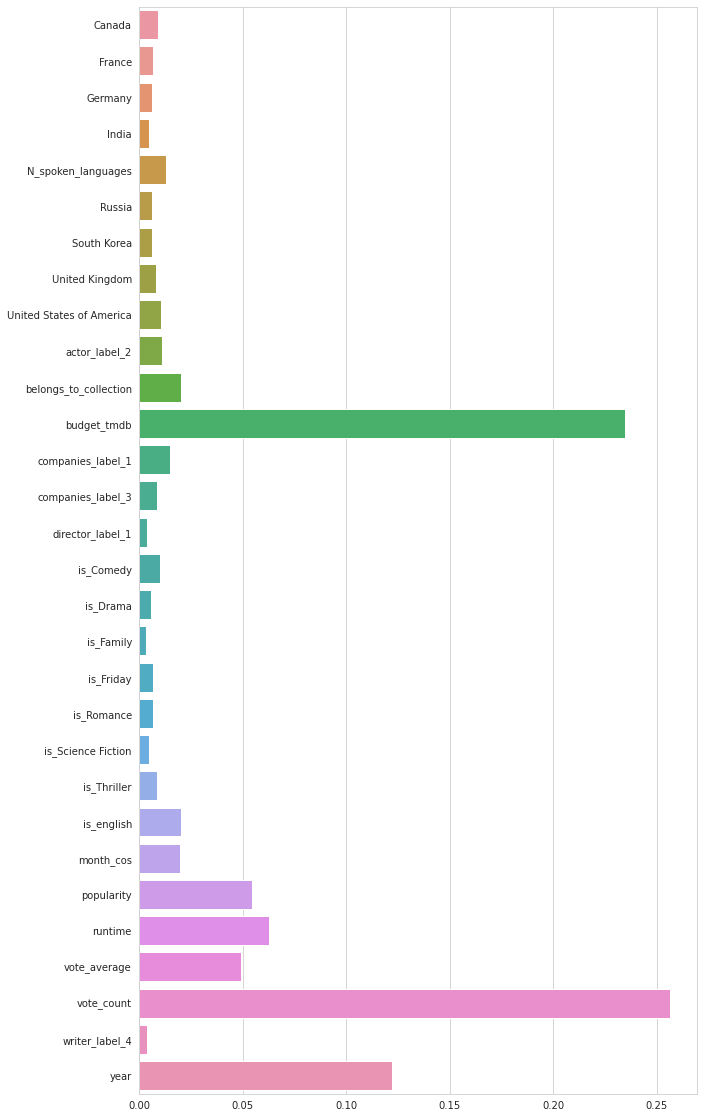

In [554]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,20))
sns.barplot(x=gbr.feature_importances_, y=train_X.columns)

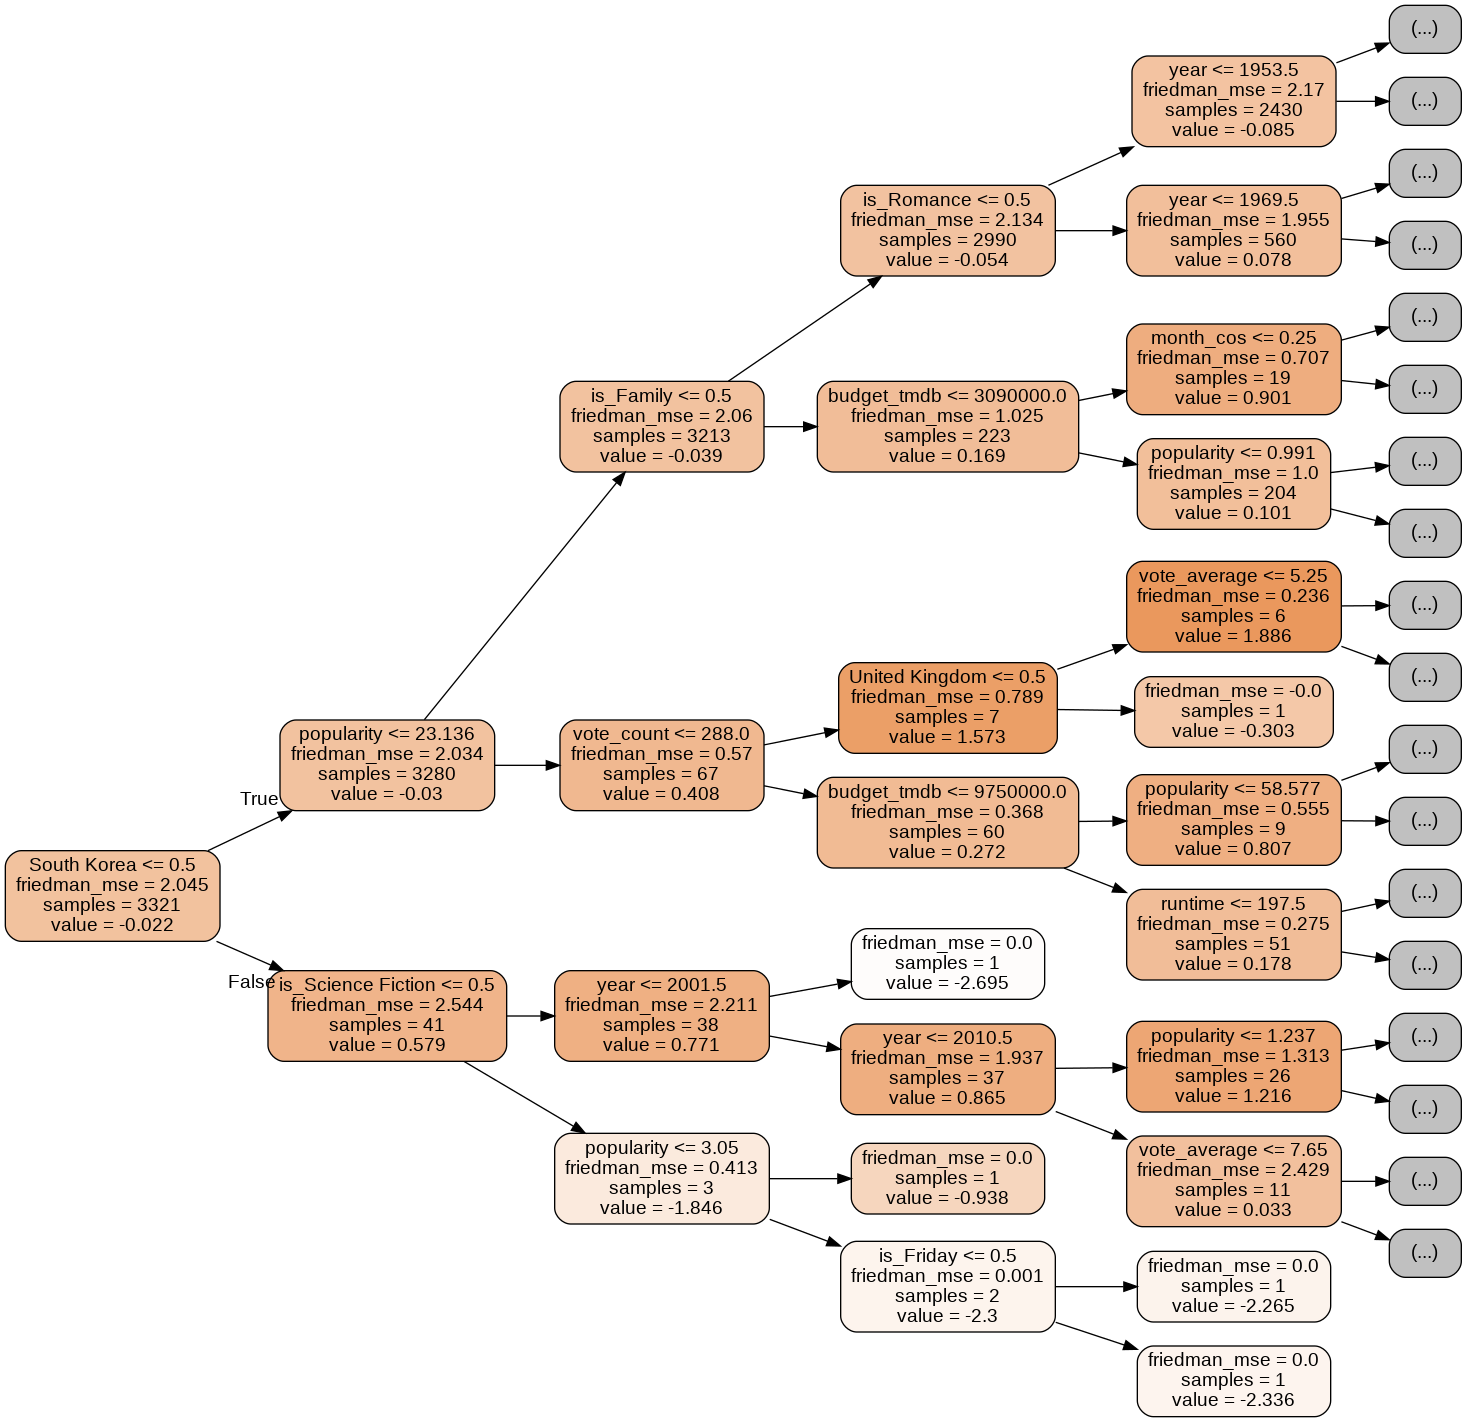

In [555]:
# visualize the actual decision tree obtained 
dot_data = export_graphviz(gbr[-1][0],
               out_file=None,
               max_depth=4, 
               feature_names=list(train_X.columns),  
               filled=True,
               rotate=True,
               rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<a id='asr'></a>
### 8). AutoSklearnRegressor ([to top](#top))

In [556]:
X, y = return_df.drop(['revenue', 'return', 'return_log'], axis=1), return_df['return_log']
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

asr = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=1000,
    per_run_time_limit=100,
    ensemble_size = 1000,
    ensemble_nbest = 1000,
    seed = 42,
    tmp_folder='/tmp/autosklearn_regression_example_tmp5'
)
asr.fit(train_X, train_y, dataset_name='Movies')

AutoSklearnRegressor(ensemble_nbest=1000, ensemble_size=1000,
                     per_run_time_limit=100, seed=42,
                     time_left_for_this_task=1000,
                     tmp_folder='/tmp/autosklearn_regression_example_tmp5')

In [557]:
print(asr.leaderboard())

          rank  ensemble_weight           type      cost   duration
model_id                                                           
3            1            0.636    extra_trees  0.646273   8.370273
36           2            0.364  decision_tree  0.703105  19.840390


In [558]:
asr.get_models_with_weights()[0][1]

SimpleRegressionPipeline({'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'extra_trees', 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'median', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'quantile_transformer', 'regressor:extra_trees:bootstrap': 'False', 'regressor:extra_trees:criterion': 'mse', 'regressor:extra_trees:max_depth': 'None', 'regressor:extra_trees:max_features': 0.6962692885049272, 'regressor:extra_trees:max_leaf_nodes': 'None', 'regressor:extra_trees:min_impurity_decrease': 0.0, 'regressor:extra_trees:min_samples_leaf': 17, 'regressor:extra_trees:min_samples_split': 17, 'regressor:extra_trees:min_weight_fraction_leaf'

In [559]:
print(asr.show_models())

[(0.636000, SimpleRegressionPipeline({'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'extra_trees', 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'median', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'quantile_transformer', 'regressor:extra_trees:bootstrap': 'False', 'regressor:extra_trees:criterion': 'mse', 'regressor:extra_trees:max_depth': 'None', 'regressor:extra_trees:max_features': 0.6962692885049272, 'regressor:extra_trees:max_leaf_nodes': 'None', 'regressor:extra_trees:min_impurity_decrease': 0.0, 'regressor:extra_trees:min_samples_leaf': 17, 'regressor:extra_trees:min_samples_split': 17, 'regressor:extra_trees:min_weight_fr

In [560]:
train_predictions = asr.predict(train_X)
print("Train RMSE : {:.4f}".format(np.sqrt(mean_squared_error(train_y, train_predictions))))
print("Train MAE : {:.4f}".format(mean_absolute_error(train_y, train_predictions)))
print("Train R2 score:", sklearn.metrics.r2_score(train_y, train_predictions))

Train RMSE : 1.7455
Train MAE : 1.1019
Train R2 score: 0.47644703510920394


In [561]:
test_predictions = asr.predict(test_X)
asr_results = {
    "RMSE" : np.sqrt(mean_squared_error(test_y, test_predictions)),
    "MAE" : mean_absolute_error(test_y, test_predictions),
    "R2" : r2_score(test_y, test_predictions)
}
print("Test RMSE : {:.4f}".format(asr_results['RMSE']))
print("Test MAE : {:.4f}".format(asr_results['MAE']))
print("Test R2 : {:.4f}".format(asr_results['R2']))

Test RMSE : 1.9721
Test MAE : 1.2821
Test R2 : 0.3843


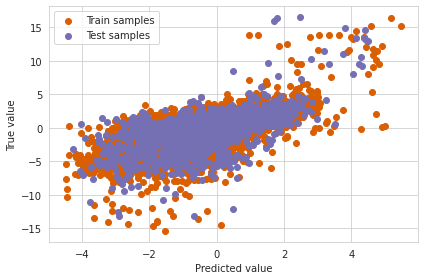

In [562]:
plt.scatter(train_predictions, train_y, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, test_y, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.tight_layout()
plt.show()

<a id='expr'></a>
### 9). Experiments ([to top](#top))

In [563]:
all_models = [
    ("Dummy", dr_results, dr),
    ("DecisionTree", dtr_results, [dtr, dtr_rfe]),
    ("Multi-layer Perceptron", mlpr_results, mlpr),
    ("Convolutional NN", cnnr_results, cnnr),
    ("CNN-XGBoost", cxr_results, [xbr, rm2]),
    ("RandomForest", rfr_results, [rfr, rfr_rfe]),
    ("GradientBossting", gbr_results, [gbr, gbr_rfe]),
    ("AutoSklearn", asr_results, asr)
]
table = [[model_name,
          "%4.2f" % (model_results["RMSE"]),
          "%4.2f" % (model_results["MAE"]),
          "%4.2f" % (model_results["R2"])]
         for model_name, model_results, model in all_models]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["Model", "RMSE", "MAE", "R2"])))

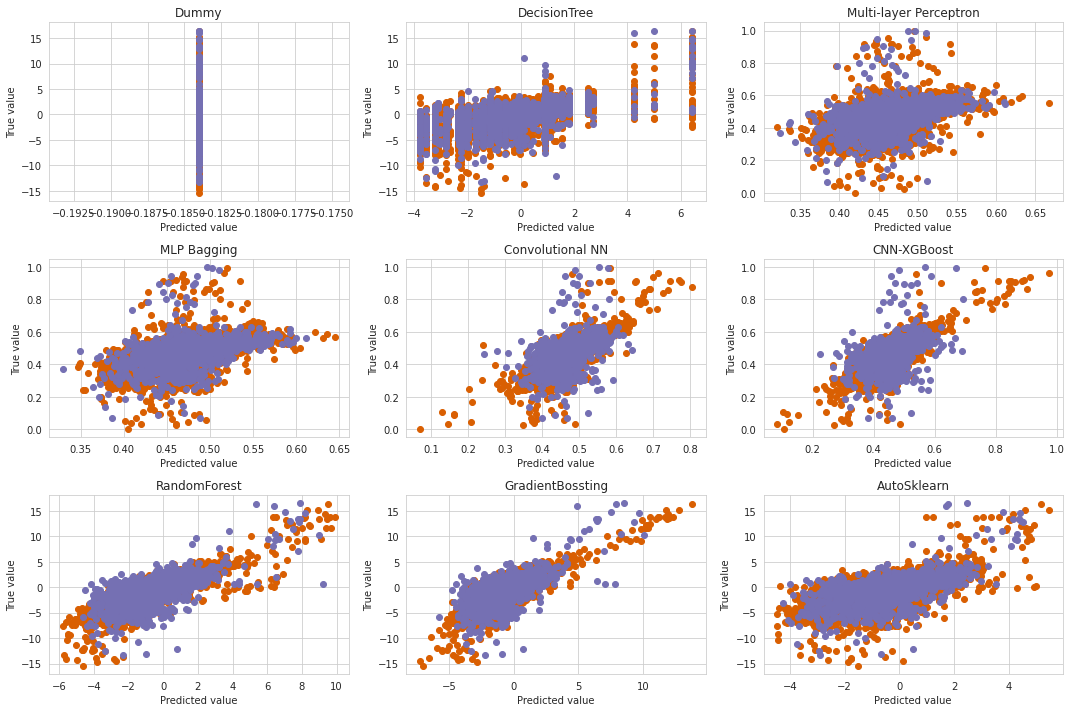

In [570]:
X, y = return_df.drop(['revenue', 'return', 'return_log'], axis=1), return_df['return_log']
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)
train_X_m, test_X_m, train_y_m, test_y_m = train_test_split(X_m, y_m, train_size=0.75, test_size=0.25, random_state=0)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

axs[0, 0].scatter(dr.predict(train_X), train_y, label="Train samples", c='#d95f02')
axs[0, 0].scatter(dr.predict(test_X), test_y, label="Test samples", c='#7570b3')
axs[0, 0].set_xlabel("Predicted value")
axs[0, 0].set_ylabel("True value")
axs[0, 0].set_title("Dummy")

axs[0, 1].scatter(dtr.predict(train_X.loc[:, dtr_rfe.support_]), train_y, label="Train samples", c='#d95f02')
axs[0, 1].scatter(dtr.predict(test_X.loc[:, dtr_rfe.support_]), test_y, label="Test samples", c='#7570b3')
axs[0, 1].set_xlabel("Predicted value")
axs[0, 1].set_ylabel("True value")
axs[0, 1].set_title("DecisionTree")

axs[0, 2].scatter(mlpr.predict(train_X_m), train_y_m, label="Train samples", c='#d95f02')
axs[0, 2].scatter(mlpr.predict(test_X_m), test_y_m, label="Test samples", c='#7570b3')
axs[0, 2].set_xlabel("Predicted value")
axs[0, 2].set_ylabel("True value")
axs[0, 2].set_title("Multi-layer Perceptron")

axs[1, 0].scatter(mlpr_bagging.predict(train_X_m), train_y_m, label="Train samples", c='#d95f02')
axs[1, 0].scatter(mlpr_bagging.predict(test_X_m), test_y_m, label="Test samples", c='#7570b3')
axs[1, 0].set_xlabel("Predicted value")
axs[1, 0].set_ylabel("True value")
axs[1, 0].set_title("MLP Bagging")

axs[1, 1].scatter(np.squeeze(cnnr.predict(np.expand_dims(train_X_m, axis=2))), train_y_m, label="Train samples", c='#d95f02')
axs[1, 1].scatter(np.squeeze(cnnr.predict(np.expand_dims(test_X_m, axis=2))), test_y_m, label="Test samples", c='#7570b3')
axs[1, 1].set_xlabel("Predicted value")
axs[1, 1].set_ylabel("True value")
axs[1, 1].set_title("Convolutional NN")

axs[1, 2].scatter(xbr.predict(rm2.predict(np.expand_dims(train_X_m, axis=2))), train_y_m, label="Train samples", c='#d95f02')
axs[1, 2].scatter(xbr.predict(rm2.predict(np.expand_dims(test_X_m, axis=2))), test_y_m, label="Test samples", c='#7570b3')
axs[1, 2].set_xlabel("Predicted value")
axs[1, 2].set_ylabel("True value")
axs[1, 2].set_title("CNN-XGBoost")

axs[2, 0].scatter(rfr.predict(train_X.loc[:, rfr_rfe.support_]), train_y, label="Train samples", c='#d95f02')
axs[2, 0].scatter(rfr.predict(test_X.loc[:, rfr_rfe.support_]), test_y, label="Test samples", c='#7570b3')
axs[2, 0].set_xlabel("Predicted value")
axs[2, 0].set_ylabel("True value")
axs[2, 0].set_title("RandomForest")

axs[2, 1].scatter(gbr.predict(train_X.loc[:, gbr_rfe.support_]), train_y, label="Train samples", c='#d95f02')
axs[2, 1].scatter(gbr.predict(test_X.loc[:, gbr_rfe.support_]), test_y, label="Test samples", c='#7570b3')
axs[2, 1].set_xlabel("Predicted value")
axs[2, 1].set_ylabel("True value")
axs[2, 1].set_title("GradientBossting")

axs[2, 2].scatter(asr.predict(train_X), train_y, label="Train samples", c='#d95f02')
axs[2, 2].scatter(asr.predict(test_X), test_y, label="Test samples", c='#7570b3')
axs[2, 2].set_xlabel("Predicted value")
axs[2, 2].set_ylabel("True value")
axs[2, 2].set_title("AutoSklearn")

fig.tight_layout()
plt.show()

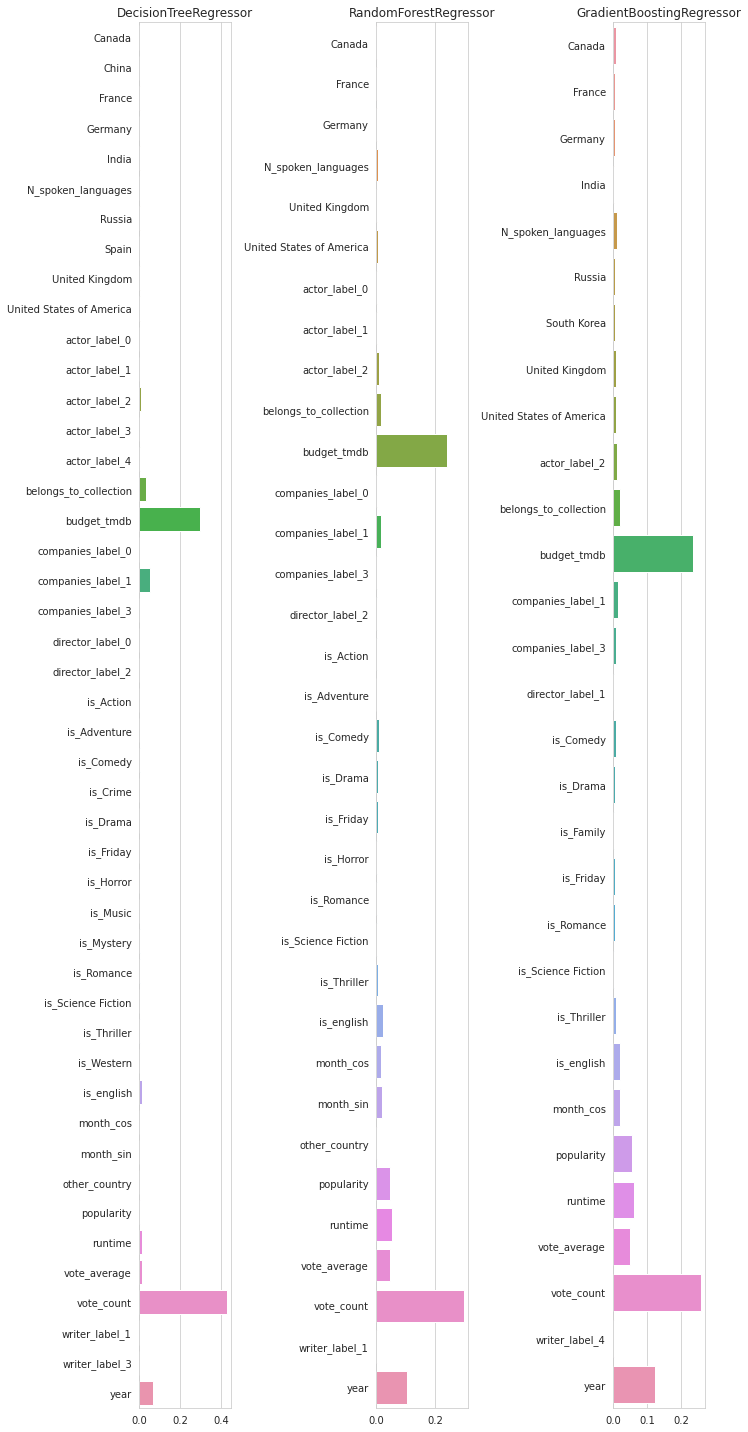

In [565]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 20))
classifiers = [dtr, rfr, gbr]
rfes = [dtr_rfe, rfr_rfe, gbr_rfe]
for cls, rfe, ax in zip(classifiers, rfes, axs.flatten()):
  sns.barplot(x=cls.feature_importances_, y=train_X.loc[:, rfe.support_].columns, ax=ax)
  ax.title.set_text(type(cls).__name__)

fig.tight_layout()
plt.show()

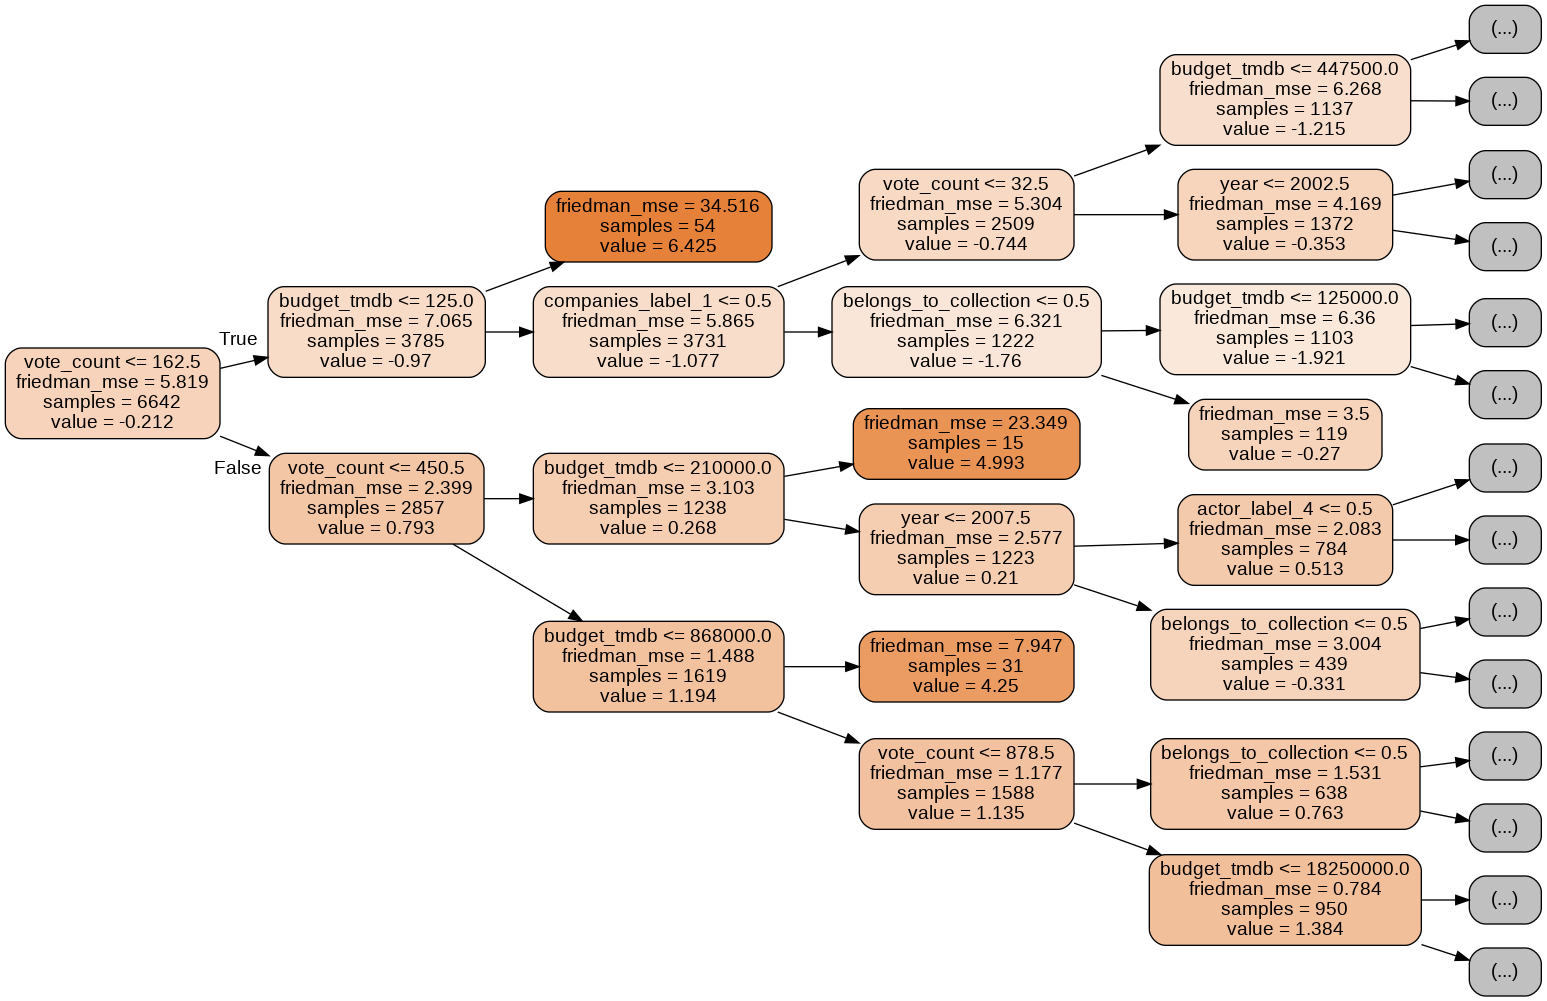

In [566]:
# visualize the actual decision tree obtained 
dot_data = export_graphviz(dtr,
               out_file=None,
               max_depth=4, 
               feature_names=list(train_X.loc[:, dtr_rfe.support_].columns),  
               filled=True,
               rotate=True,
               rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<a id='clf'></a>
## B. Movie Profitability Classification ([to top](#top))

<a id='afec'></a>
### 1). Additional Features Engineering ([to top](#top))

Let us convert our **return_log** feature into a binary variable that will serve as our classes: 0 indicating a flop and 1 indicating a hit.

In [116]:
return_df['profitability'] = return_df['return_log'].apply(lambda x: 1 if x >=0 else 0)

In [117]:
X, y = return_df.drop(['revenue', 'return', 'return_log','profitability'], axis=1), return_df['profitability']

<a id='hud'></a>
### 2). Handling Unbalanced Data ([to top](#top))

In [118]:
y.value_counts()

1    4892
0    3964
Name: profitability, dtype: int64

In [119]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

In [120]:
test_X_no_sm, test_y_no_sm = test_X, test_y

In [121]:
train_X.shape, train_y.shape

((6642, 68), (6642,))

In [122]:
# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
train_X_sm, train_y_sm = sm.fit_resample(train_X, train_y)
train_X_sm.shape, train_y_sm.shape

((7334, 68), (7334,))

In [123]:
train_y_sm.value_counts()

1    3667
0    3667
Name: profitability, dtype: int64

<a id='dc'></a>
### 3). DummyClassifier ([to top](#top))

In [125]:
# "stratified", "most_frequent", "prior", "uniform", "constant"
dc = DummyClassifier(strategy="most_frequent")
dc.fit(train_X_sm, train_y_sm)
test_predictions = dc.predict(test_X)
precision, recall, fscore, _ = score(test_y,test_predictions,average='macro')
dc_results = {
    "accuracy" : dc.score(test_X, test_y),
    "precision" : precision,
    "recall" : recall,
    "fscore" : fscore,
    "roc_auc" : roc_auc_score(test_y,test_predictions)
}
print('Accuracy for testset: %.4f' % dc_results["accuracy"])
print('Precision for testset: %.4f' % dc_results["precision"])
print('Recall for testset: %.4f' % dc_results["recall"])
print('Fscore for testset: %.4f' % dc_results["fscore"])
print('Roc_auc for testset: %.4f' % dc_results["roc_auc"])

Accuracy for testset: 0.4467
Precision for testset: 0.2234
Recall for testset: 0.5000
Fscore for testset: 0.3088
Roc_auc for testset: 0.5000


<a id='dtc'></a>
### 4). DecisionTreeClassifier ([to top](#top))

In [126]:
train_X, train_y = train_X_sm, train_y_sm
test_X, test_y = test_X_no_sm, test_y_no_sm

In [127]:
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(2, train_X.shape[1], 4):
  rfe = RFE(estimator=DecisionTreeClassifier(random_state = 0), n_features_to_select=i)
  model = DecisionTreeClassifier(random_state = 0)
  models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

2 0.632 (0.026)
6 0.685 (0.024)
10 0.693 (0.024)
14 0.690 (0.023)
18 0.690 (0.030)
22 0.691 (0.028)
26 0.690 (0.028)
30 0.690 (0.026)
34 0.690 (0.027)
38 0.691 (0.026)
42 0.695 (0.023)
46 0.694 (0.031)
50 0.692 (0.029)
54 0.692 (0.028)
58 0.700 (0.025)
62 0.690 (0.026)
66 0.691 (0.019)


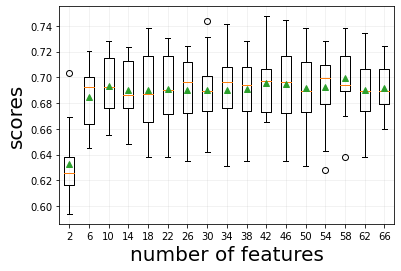

In [128]:
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, train_X[:int(len(train_X)*0.2)], train_y[:int(len(train_X)*0.2)])
 results.append(scores)
 names.append(name)
 print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('number of features', fontsize=20)
plt.ylabel('scores', fontsize=20)
plt.grid(alpha=0.2)
plt.show()

In [129]:
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(random_state = 0), n_features_to_select=10)
# let's create a pipeline
model = DecisionTreeClassifier(random_state = 0)
# create a pipeline
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

In [130]:
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
n_scores = cross_val_score(model, train_X, train_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuray for cv: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuray for cv: 0.707 (0.009)


In [131]:
pipeline.fit(train_X, train_y)
scores = pipeline.score(test_X, test_y)
# report performance
print('Accuracy for testset: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for testset: 0.686 (0.000)


In [132]:
# summarize all features
for i in range(train_X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 39.000
Column: 1, Selected False, Rank: 33.000
Column: 2, Selected False, Rank: 52.000
Column: 3, Selected False, Rank: 37.000
Column: 4, Selected False, Rank: 29.000
Column: 5, Selected False, Rank: 44.000
Column: 6, Selected False, Rank: 3.000
Column: 7, Selected False, Rank: 49.000
Column: 8, Selected False, Rank: 40.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 22.000
Column: 11, Selected False, Rank: 34.000
Column: 12, Selected False, Rank: 46.000
Column: 13, Selected False, Rank: 13.000
Column: 14, Selected False, Rank: 6.000
Column: 15, Selected False, Rank: 7.000
Column: 16, Selected False, Rank: 14.000
Column: 17, Selected False, Rank: 23.000
Column: 18, Selected False, Rank: 58.000
Column: 19, Selected False, Rank: 35.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected False, Rank: 5.000
Column: 23, Selected False, Rank: 16.000
Column: 24, Selected False, Rank: 30

In [133]:
train_X, test_X = train_X.loc[:, rfe.support_], test_X.loc[:, rfe.support_]

In [134]:
dtc_rfe = rfe

In [135]:
params = {'criterion':['gini','entropy'],
          'splitter' : ['best', 'random'],
          'max_depth' : [2, 5, 10, 15, 20, 25, None],
          'min_samples_split' : [100, 150, 200],
          'min_samples_leaf': [2, 5, 10, 15, 20, 25]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=0),params,verbose=1,cv=5,scoring='accuracy',n_jobs=-1)
grid_search_cv.fit(train_X,train_y)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 15, 20, 25, None],
                         'min_samples_leaf': [2, 5, 10, 15, 20, 25],
                         'min_samples_split': [100, 150, 200],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [136]:
grid_search_cv.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 20,
 'min_samples_split': 150,
 'splitter': 'best'}

In [137]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=15, min_samples_leaf=20, min_samples_split=150,
                       random_state=0)

In [138]:
dtc = grid_search_cv.best_estimator_
#dtc = DecisionTreeClassifier(max_depth=15, min_samples_leaf=20, min_samples_split=150, random_state=0)
#dtc.fit(train_X,train_y)

In [139]:
train_predictions = dtc.predict(train_X)
print("Train Accuracy score:", accuracy_score(train_y, train_predictions))
test_predictions = dtc.predict(test_X)
print("Test Accuracy score:", accuracy_score(test_y, test_predictions))

Train Accuracy score: 0.7762476138532861
Test Accuracy score: 0.7384823848238482


In [141]:
precision, recall, fscore, _ = score(test_y,test_predictions,average='macro')
dtc_results = {
    "accuracy" : accuracy_score(test_y, test_predictions),
    "precision" : precision,
    "recall" : recall,
    "fscore" : fscore,
    "roc_auc" : roc_auc_score(test_y,test_predictions)
}
print('Accuracy for testset: %.4f' % dtc_results["accuracy"])
print('Precision for testset: %.4f' % dtc_results["precision"])
print('Recall for testset: %.4f' % dtc_results["recall"])
print('Fscore for testset: %.4f' % dtc_results["fscore"])
print('Roc_auc for testset: %.4f' % dtc_results["roc_auc"])

Accuracy for testset: 0.7385
Precision for testset: 0.7359
Recall for testset: 0.7375
Fscore for testset: 0.7364
Roc_auc for testset: 0.7375


In [142]:
def report_scores(test_y, test_pred):
    print(classification_report(test_y, test_pred, target_names=['flop', 'hit']))

In [143]:
#compute the performance of the model
report_scores(train_y,train_predictions)

              precision    recall  f1-score   support

        flop       0.78      0.77      0.77      3667
         hit       0.77      0.79      0.78      3667

    accuracy                           0.78      7334
   macro avg       0.78      0.78      0.78      7334
weighted avg       0.78      0.78      0.78      7334



In [144]:
#compute the performance of the model
report_scores(test_y,test_predictions)

              precision    recall  f1-score   support

        flop       0.70      0.73      0.71       989
         hit       0.77      0.75      0.76      1225

    accuracy                           0.74      2214
   macro avg       0.74      0.74      0.74      2214
weighted avg       0.74      0.74      0.74      2214



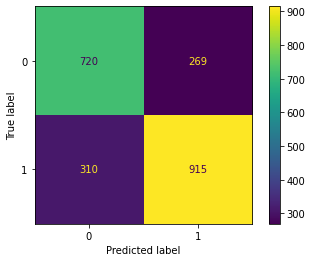

In [145]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc, test_X, test_y)
plt.show()

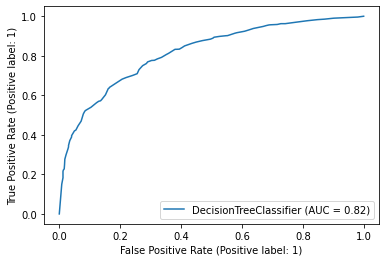

In [146]:
plot_roc_curve(dtc, test_X, test_y)

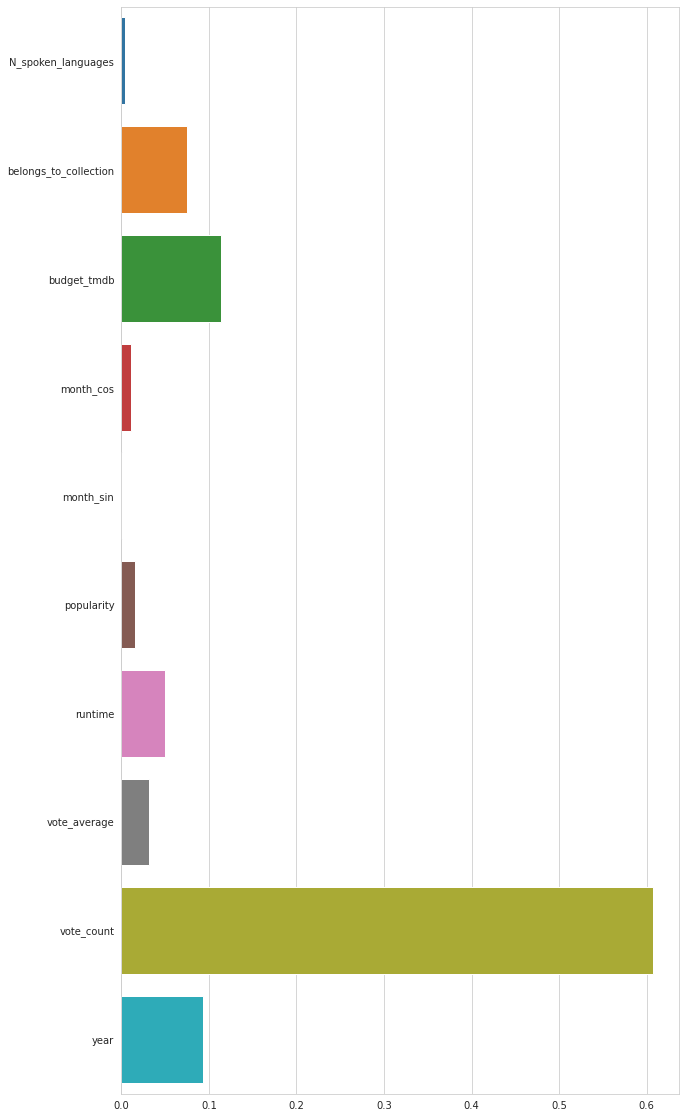

In [147]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,20))
sns.barplot(x=dtc.feature_importances_, y=train_X.columns)

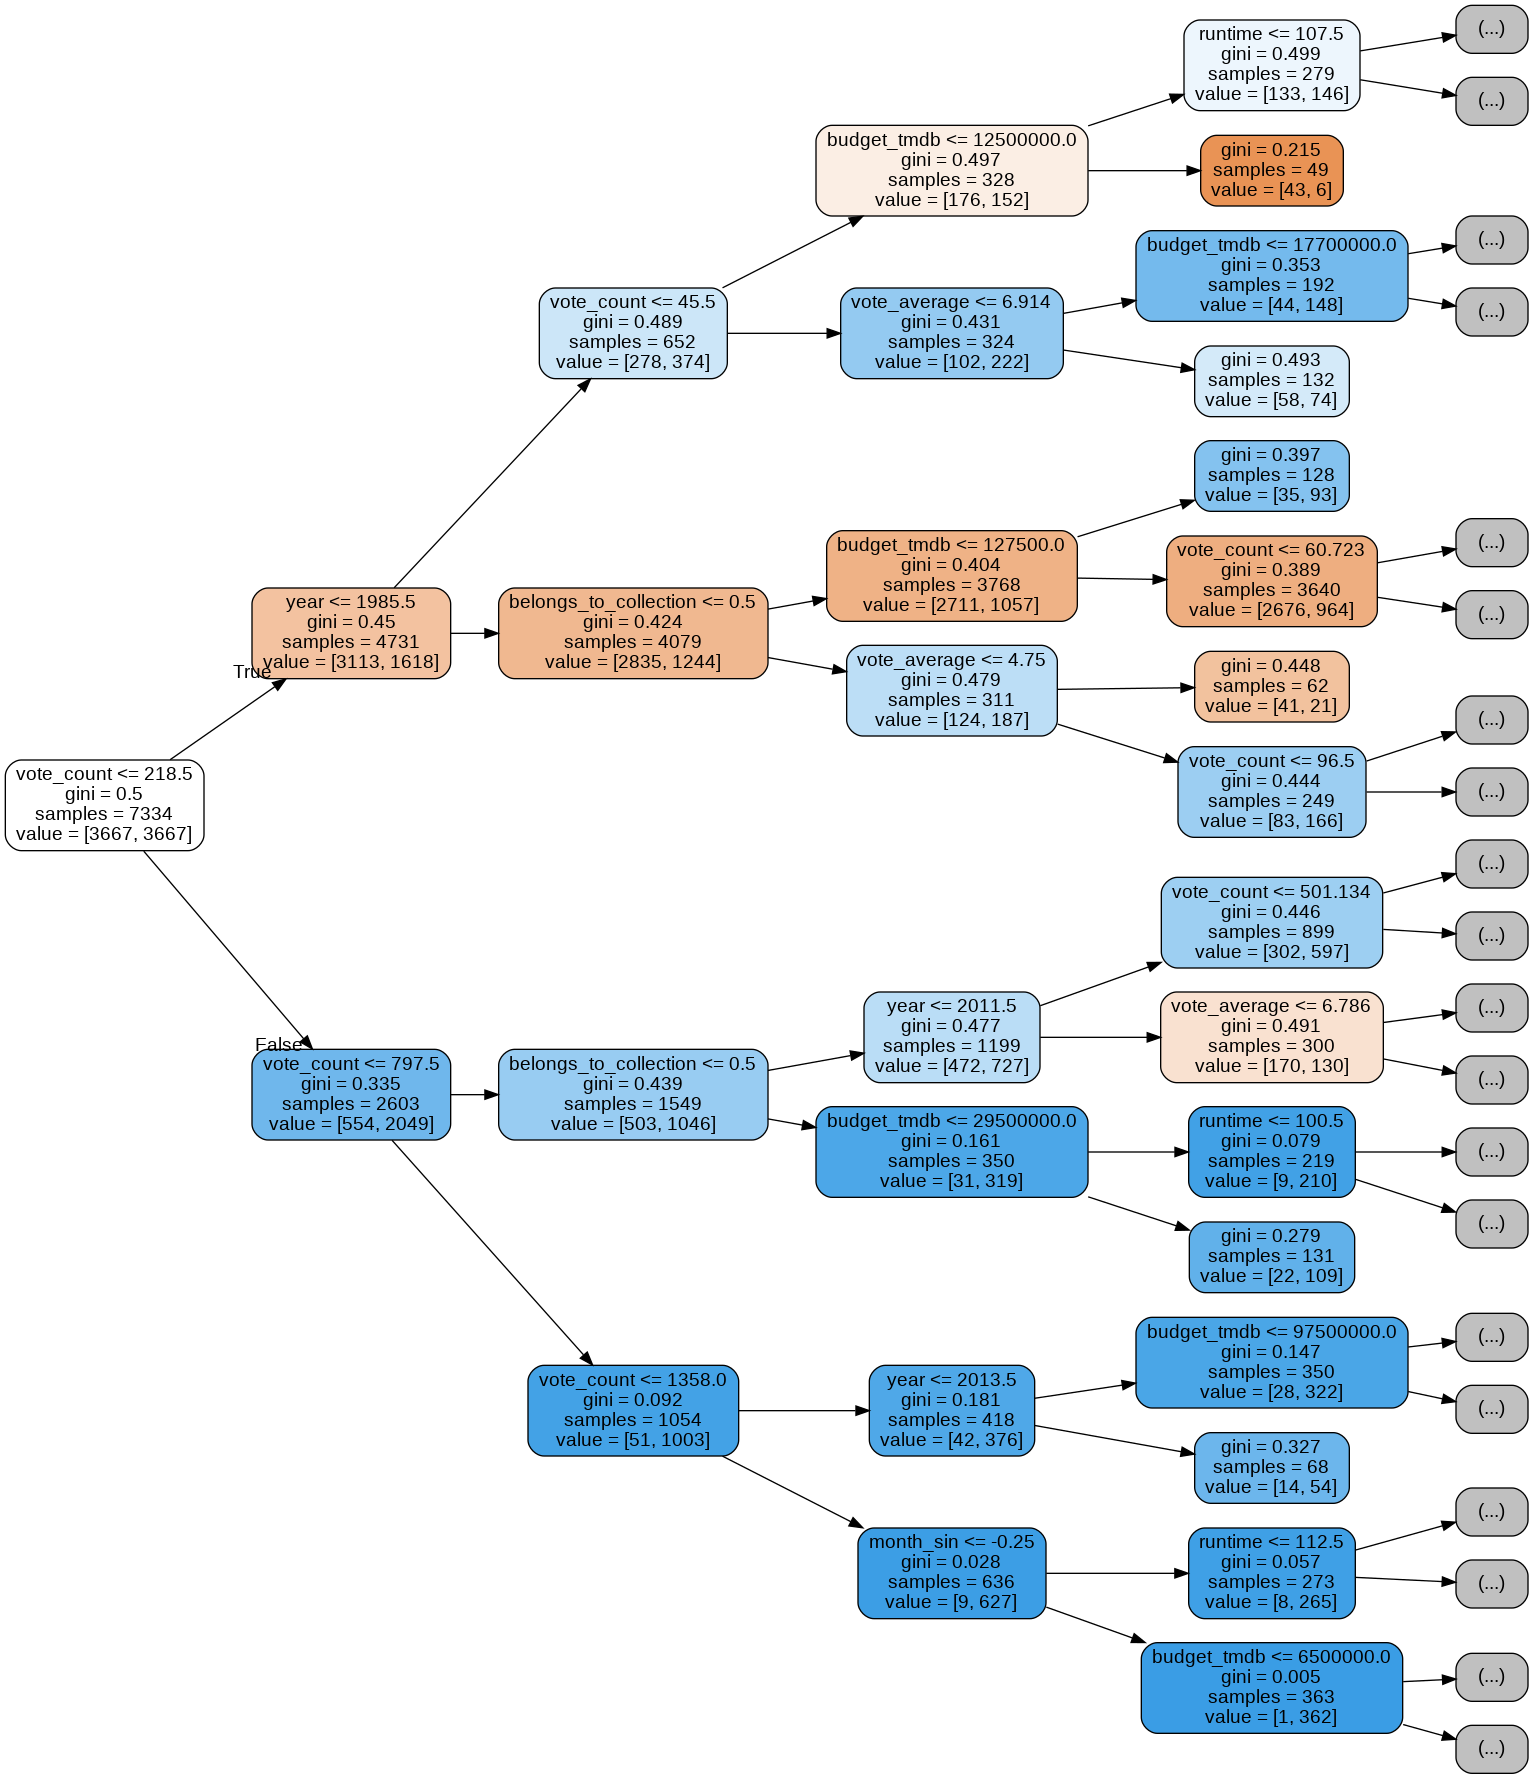

In [148]:
# visualize the actual decision tree obtained 
dot_data = export_graphviz(dtc,
               out_file=None,
               max_depth=4, 
               feature_names=list(train_X.columns),  
               filled=True,
               rotate=True,
               rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<a id='mlpc'></a>
### 5). MLPClassifier ([to top](#top))

In [255]:
X, y = return_df.drop(['revenue', 'return', 'return_log','profitability'], axis=1), return_df['profitability']

In [256]:
data = X
data.insert(len(data.columns), 'return_log', y)
data.columns, data.shape

(Index(['Australia', 'Canada', 'China', 'France', 'Germany', 'Hong Kong',
        'India', 'Italy', 'Japan', 'N_spoken_languages', 'Russia',
        'South Korea', 'Spain', 'United Kingdom', 'United States of America',
        'actor_label_0', 'actor_label_1', 'actor_label_2', 'actor_label_3',
        'actor_label_4', 'belongs_to_collection', 'budget_tmdb',
        'companies_label_0', 'companies_label_1', 'companies_label_2',
        'companies_label_3', 'director_label_0', 'director_label_1',
        'director_label_2', 'director_label_3', 'is_Action', 'is_Adventure',
        'is_Animation', 'is_Biography', 'is_Comedy', 'is_Crime',
        'is_Documentary', 'is_Drama', 'is_Family', 'is_Fantasy', 'is_Foreign',
        'is_Friday', 'is_History', 'is_Horror', 'is_Music', 'is_Musical',
        'is_Mystery', 'is_Romance', 'is_Science Fiction', 'is_Sport',
        'is_TV Movie', 'is_Thriller', 'is_War', 'is_Western', 'is_english',
        'month_cos', 'month_sin', 'other_country', 'popular

In [257]:
scaler_m = MinMaxScaler()
data_m = scaler_m.fit_transform(data.values)
X_c_m = data_m[:, 0:len(data.columns)-1]
y_c_m = data_m[:,len(data.columns)-1]

In [258]:
train_X, test_X, train_y, test_y = train_test_split(X_c_m, y_c_m, train_size=0.75, test_size=0.25, random_state=0)
model = MLPClassifier(random_state = 0, early_stopping=True, max_iter=1000)

In [259]:
# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
train_X, train_y = sm.fit_resample(train_X, train_y)
train_X.shape, train_y.shape

((7334, 68), (7334,))

In [260]:
# evaluate model
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)
n_scores = cross_val_score(model, train_X, train_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy for cv: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy for cv: 0.726 (0.023)


In [261]:
model.fit(train_X, train_y)
scores = model.score(test_X, test_y)
# report performance
print('Accuracy for testset: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for testset: 0.739 (0.000)


In [262]:
params = {"hidden_layer_sizes": [(1,),(2,),(3,)],
          "activation": ["identity", "logistic", "tanh", "relu"],
          "solver": ["lbfgs", "sgd", "adam"],
          "alpha": [0.001,0.005,0.01]}

grid_search_cv = GridSearchCV(model,params,verbose=1,cv=5,scoring='r2',n_jobs=-1)
grid_search_cv.fit(train_X,train_y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True, max_iter=1000,
                                     random_state=0),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.001, 0.005, 0.01],
                         'hidden_layer_sizes': [(1,), (2,), (3,)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='r2', verbose=1)

In [263]:
grid_search_cv.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'hidden_layer_sizes': (1,),
 'solver': 'lbfgs'}

In [264]:
grid_search_cv.best_estimator_

MLPClassifier(activation='tanh', alpha=0.001, early_stopping=True,
              hidden_layer_sizes=(1,), max_iter=1000, random_state=0,
              solver='lbfgs')

In [265]:
mlpc = grid_search_cv.best_estimator_
#mlpc = MLPClassifier(activation='tanh', alpha=0.001, early_stopping=True, hidden_layer_sizes=(1,), max_iter=1000, random_state=0, solver='lbfgs')
#mlpc.fit(train_X,train_y)

In [266]:
train_predictions = mlpc.predict(train_X)
print("Train Accuracy score:", sklearn.metrics.accuracy_score(train_y, train_predictions))
test_predictions = mlpc.predict(test_X)
print("Test Accuracy score:", sklearn.metrics.accuracy_score(test_y, test_predictions))

Train Accuracy score: 0.7676574856831198
Test Accuracy score: 0.7583559168925023


In [267]:
precision, recall, fscore, _ = score(test_y,test_predictions,average='macro')
mlpc_results = {
    "accuracy" : accuracy_score(test_y, test_predictions),
    "precision" : precision,
    "recall" : recall,
    "fscore" : fscore,
    "roc_auc" : roc_auc_score(test_y,test_predictions)
}
print('Accuracy for testset: %.4f' % mlpc_results["accuracy"])
print('Precision for testset: %.4f' % mlpc_results["precision"])
print('Recall for testset: %.4f' % mlpc_results["recall"])
print('Fscore for testset: %.4f' % mlpc_results["fscore"])
print('Roc_auc for testset: %.4f' % mlpc_results["roc_auc"])

Accuracy for testset: 0.7584
Precision for testset: 0.7595
Recall for testset: 0.7623
Fscore for testset: 0.7579
Roc_auc for testset: 0.7623


In [268]:
def report_scores(test_y, test_pred):
    print(classification_report(test_y, test_pred, target_names=['flop', 'hit']))

In [269]:
#compute the performance of the model
report_scores(train_y,train_predictions)

              precision    recall  f1-score   support

        flop       0.75      0.80      0.77      3667
         hit       0.78      0.74      0.76      3667

    accuracy                           0.77      7334
   macro avg       0.77      0.77      0.77      7334
weighted avg       0.77      0.77      0.77      7334



In [270]:
#compute the performance of the model
report_scores(test_y,test_predictions)

              precision    recall  f1-score   support

        flop       0.70      0.80      0.75       989
         hit       0.82      0.72      0.77      1225

    accuracy                           0.76      2214
   macro avg       0.76      0.76      0.76      2214
weighted avg       0.77      0.76      0.76      2214



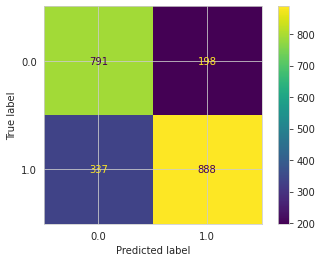

In [271]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlpc, test_X, test_y)
plt.show()

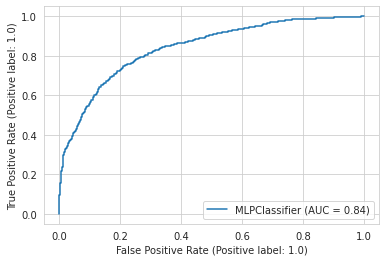

In [272]:
plot_roc_curve(mlpc, test_X, test_y)

In [273]:
mlpc_bagging = BaggingClassifier(base_estimator=mlpc, n_estimators=50, random_state=0).fit(train_X,train_y)

In [274]:
train_predictions = mlpc_bagging.predict(train_X)
print("Train Accuracy score:", accuracy_score(train_y, train_predictions))
test_predictions = mlpc_bagging.predict(test_X)
print("Test Accuracy score:", accuracy_score(test_y, test_predictions))

Train Accuracy score: 0.7675211344423234
Test Accuracy score: 0.7606142728093948


In [275]:
precision, recall, fscore, _ = score(test_y,test_predictions,average='macro')
mlpc_bagging_results = {
    "accuracy" : accuracy_score(test_y, test_predictions),
    "precision" : precision,
    "recall" : recall,
    "fscore" : fscore,
    "roc_auc" : roc_auc_score(test_y,test_predictions)
}
print('Accuracy for testset: %.4f' % mlpc_bagging_results["accuracy"])
print('Precision for testset: %.4f' % mlpc_bagging_results["precision"])
print('Recall for testset: %.4f' % mlpc_bagging_results["recall"])
print('Fscore for testset: %.4f' % mlpc_bagging_results["fscore"])
print('Roc_auc for testset: %.4f' % mlpc_bagging_results["roc_auc"])

Accuracy for testset: 0.7606
Precision for testset: 0.7616
Recall for testset: 0.7645
Fscore for testset: 0.7601
Roc_auc for testset: 0.7645


In [276]:
def report_scores(test_y, test_pred):
    print(classification_report(test_y, test_pred, target_names=['flop', 'hit']))

In [277]:
#compute the performance of the model
report_scores(train_y,train_predictions)

              precision    recall  f1-score   support

        flop       0.75      0.80      0.77      3667
         hit       0.78      0.74      0.76      3667

    accuracy                           0.77      7334
   macro avg       0.77      0.77      0.77      7334
weighted avg       0.77      0.77      0.77      7334



In [278]:
#compute the performance of the model
report_scores(test_y,test_predictions)

              precision    recall  f1-score   support

        flop       0.70      0.80      0.75       989
         hit       0.82      0.73      0.77      1225

    accuracy                           0.76      2214
   macro avg       0.76      0.76      0.76      2214
weighted avg       0.77      0.76      0.76      2214



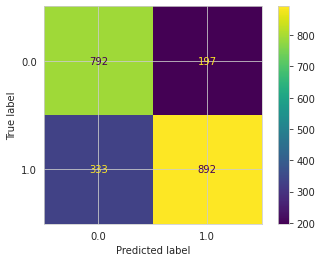

In [279]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlpc_bagging, test_X, test_y)
plt.show()

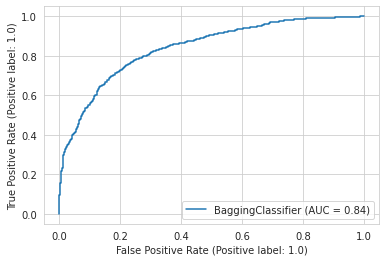

In [280]:
plot_roc_curve(mlpc_bagging, test_X, test_y)

<a id='cnn-svc'></a>
### 6). CNN-SVC/XGBoost ([to top](#top))

In [174]:
X, y = return_df.drop(['revenue', 'return', 'return_log','profitability'], axis=1), return_df['profitability']

In [175]:
data = X
data.insert(len(data.columns), 'profitability', y)
data.columns, data.shape

(Index(['Australia', 'Canada', 'China', 'France', 'Germany', 'Hong Kong',
        'India', 'Italy', 'Japan', 'N_spoken_languages', 'Russia',
        'South Korea', 'Spain', 'United Kingdom', 'United States of America',
        'actor_label_0', 'actor_label_1', 'actor_label_2', 'actor_label_3',
        'actor_label_4', 'belongs_to_collection', 'budget_tmdb',
        'companies_label_0', 'companies_label_1', 'companies_label_2',
        'companies_label_3', 'director_label_0', 'director_label_1',
        'director_label_2', 'director_label_3', 'is_Action', 'is_Adventure',
        'is_Animation', 'is_Biography', 'is_Comedy', 'is_Crime',
        'is_Documentary', 'is_Drama', 'is_Family', 'is_Fantasy', 'is_Foreign',
        'is_Friday', 'is_History', 'is_Horror', 'is_Music', 'is_Musical',
        'is_Mystery', 'is_Romance', 'is_Science Fiction', 'is_Sport',
        'is_TV Movie', 'is_Thriller', 'is_War', 'is_Western', 'is_english',
        'month_cos', 'month_sin', 'other_country', 'popular

In [176]:
scaler_m = MinMaxScaler()
data_m = scaler_m.fit_transform(data.values)
X_c_m = data_m[:, 0:len(data.columns)-1]
y_c_m = data_m[:,len(data.columns)-1]

In [177]:
train_X, test_X, train_y, test_y = train_test_split(X_c_m, y_c_m, train_size=0.75, test_size=0.25, random_state=0)
train_X.shape, test_X.shape

((6642, 68), (2214, 68))

In [178]:
x_train = np.expand_dims(train_X, axis=2)
x_test = np.expand_dims(test_X, axis=2)
x_train.shape, x_test.shape

((6642, 68, 1), (2214, 68, 1))

In [179]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, BatchNormalization, MaxPooling1D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import model_from_json
from tensorflow.keras import backend as K
tf.random.set_seed(42)

model = Sequential()
model.add(Conv1D(128, (5), dilation_rate=3, input_shape=(train_X.shape[1],1), activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu', name='output_2'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid', name='output_1'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, train_y,
          batch_size=64,
          epochs=50,
          verbose=2,
          validation_split=0.1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 56, 128)           768       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 28, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 128)           0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 128)           512       
_________________________________________________________________
flatten (Flatten)            (None, 3584)              0         
_________________________________________________________________
output_2 (Dense)             (None, 64)                229440    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [180]:
cnnc = model

In [181]:
train_predictions = np.squeeze(model.predict(x_train))
train_predictions = (train_predictions > 0.5)
print("Train Accuracy score:", sklearn.metrics.accuracy_score(train_y, train_predictions))
test_predictions = np.squeeze(model.predict(x_test))
test_predictions = (test_predictions > 0.5)
print("Test Accuracy score:", sklearn.metrics.accuracy_score(test_y, test_predictions))

Train Accuracy score: 0.7898223426678711
Test Accuracy score: 0.7542908762420958


In [182]:
precision, recall, fscore, _ = score(test_y,test_predictions,average='macro')
cnnc_results = {
    "accuracy" : accuracy_score(test_y, test_predictions),
    "precision" : precision,
    "recall" : recall,
    "fscore" : fscore,
    "roc_auc" : roc_auc_score(test_y,test_predictions)
}
print('Accuracy for testset: %.4f' % cnnc_results["accuracy"])
print('Precision for testset: %.4f' % cnnc_results["precision"])
print('Recall for testset: %.4f' % cnnc_results["recall"])
print('Fscore for testset: %.4f' % cnnc_results["fscore"])
print('Roc_auc for testset: %.4f' % cnnc_results["roc_auc"])

Accuracy for testset: 0.7543
Precision for testset: 0.7519
Recall for testset: 0.7537
Fscore for testset: 0.7525
Roc_auc for testset: 0.7537


In [183]:
from tensorflow.keras.models import Model

cm1 = Model(inputs=model.input, outputs=model.get_layer('output_1').output)
cm2 = Model(inputs=model.input, outputs=model.get_layer('output_2').output)

In [184]:
from sklearn.svm import SVC

svc = SVC(random_state=0)
svc.fit(cm2.predict(x_train), train_y)
scores = svc.score(cm2.predict(x_test),test_y)
print('Accuracy for CNN-SVC-2: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for CNN-SVC-2: 0.754 (0.000)


In [185]:
svc = SVC(random_state=0)
svc.fit(cm1.predict(x_train), train_y)
scores = svc.score(cm1.predict(x_test),test_y)
print('Accuracy for CNN-SVC-1: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for CNN-SVC-1: 0.756 (0.000)


In [186]:
xb = xgb.XGBClassifier(random_state=0)
xb.fit(cm2.predict(x_train), train_y)
scores = xb.score(cm2.predict(x_test),test_y)
print('Accuracy for CNN-XGBoost-2: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for CNN-XGBoost-2: 0.748 (0.000)


In [187]:
xb = xgb.XGBClassifier(random_state=0)
xb.fit(cm1.predict(x_train), train_y)
scores = xb.score(cm1.predict(x_test),test_y)
print('Accuracy for CNN-XGBoost-1: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for CNN-XGBoost-1: 0.754 (0.000)


**CNN-SVC-1 :**

In [188]:
train_predictions = svc.predict(cm1.predict(x_train))
print("Train Accuracy score:", sklearn.metrics.accuracy_score(train_y, train_predictions))
test_predictions = svc.predict(cm1.predict(x_test))
print("Test Accuracy score:", sklearn.metrics.accuracy_score(test_y, test_predictions))

Train Accuracy score: 0.7902740138512496
Test Accuracy score: 0.7556458897922312


In [189]:
precision, recall, fscore, _ = score(test_y,test_predictions,average='macro')
csc_results = {
    "accuracy" : accuracy_score(test_y, test_predictions),
    "precision" : precision,
    "recall" : recall,
    "fscore" : fscore,
    "roc_auc" : roc_auc_score(test_y,test_predictions)
}
print('Accuracy for testset: %.4f' % csc_results["accuracy"])
print('Precision for testset: %.4f' % csc_results["precision"])
print('Recall for testset: %.4f' % csc_results["recall"])
print('Fscore for testset: %.4f' % csc_results["fscore"])
print('Roc_auc for testset: %.4f' % csc_results["roc_auc"])

Accuracy for testset: 0.7556
Precision for testset: 0.7532
Recall for testset: 0.7548
Fscore for testset: 0.7537
Roc_auc for testset: 0.7548


In [190]:
def report_scores(test_y, test_pred):
    print(classification_report(test_y, test_pred, target_names=['flop', 'hit']))

In [191]:
#compute the performance of the model
report_scores(train_y,train_predictions)

              precision    recall  f1-score   support

        flop       0.76      0.77      0.77      2975
         hit       0.81      0.81      0.81      3667

    accuracy                           0.79      6642
   macro avg       0.79      0.79      0.79      6642
weighted avg       0.79      0.79      0.79      6642



In [192]:
#compute the performance of the model
report_scores(test_y,test_predictions)

              precision    recall  f1-score   support

        flop       0.72      0.75      0.73       989
         hit       0.79      0.76      0.78      1225

    accuracy                           0.76      2214
   macro avg       0.75      0.75      0.75      2214
weighted avg       0.76      0.76      0.76      2214



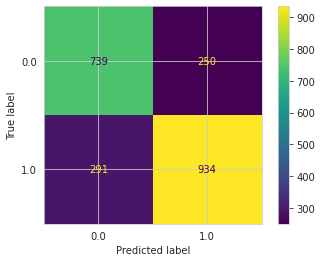

In [193]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc, cm1.predict(x_test), test_y)
plt.show()

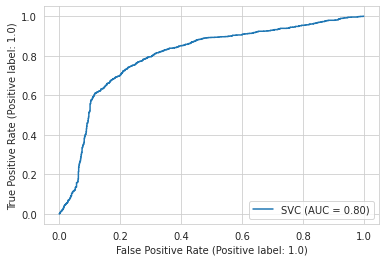

In [194]:
plot_roc_curve(svc, cm1.predict(x_test), test_y)

<a id='rfc'></a>
### 7). RandomForestClassifier ([to top](#top))

In [195]:
train_X, train_y = train_X_sm, train_y_sm
test_X, test_y = test_X_no_sm, test_y_no_sm

In [196]:
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(16, train_X.shape[1], 10):
  rfe = RFE(estimator=RandomForestClassifier(random_state = 0), n_features_to_select=i)
  model = RandomForestClassifier(random_state = 0)
  models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

16 0.751 (0.030)
26 0.752 (0.030)
36 0.752 (0.027)
46 0.756 (0.031)
56 0.756 (0.031)
66 0.754 (0.029)


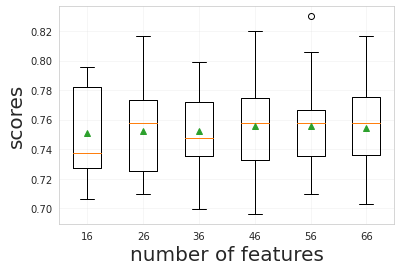

In [197]:
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, train_X[:int(len(train_X)*0.2)], train_y[:int(len(train_X)*0.2)])
 results.append(scores)
 names.append(name)
 print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('number of features', fontsize=20)
plt.ylabel('scores', fontsize=20)
plt.grid(alpha=0.2)
plt.show()

In [198]:
# create pipeline
rfe = RFE(estimator=RandomForestClassifier(random_state = 0), n_features_to_select=46)
# let's create a pipeline
model = RandomForestClassifier(random_state = 0)
# create a pipeline
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

In [199]:
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
n_scores = cross_val_score(model, train_X, train_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuray for cv: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuray for cv: 0.782 (0.007)


In [200]:
pipeline.fit(train_X, train_y)
scores = pipeline.score(test_X, test_y)
# report performance
print('Accuracy for testset: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for testset: 0.771 (0.000)


In [201]:
# summarize all features
for i in range(train_X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 9.000
Column: 1, Selected False, Rank: 3.000
Column: 2, Selected False, Rank: 10.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 16.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 14.000
Column: 8, Selected False, Rank: 8.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 2.000
Column: 11, Selected False, Rank: 13.000
Column: 12, Selected False, Rank: 12.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 11.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Column: 25, Selecte

In [202]:
train_X, test_X = train_X.loc[:, rfe.support_], test_X.loc[:, rfe.support_]

In [203]:
rfc_rfe = rfe

In [204]:
params = {'criterion' : ['gini','entropy'],
          'n_estimators' : [int(x) for x in np.linspace(start = 400, stop = 500, num = 2)],
          'min_samples_split' : [2, 5],
          'min_samples_leaf': [1, 2]}

grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=0),params,verbose=1,cv=5,scoring='accuracy',n_jobs=-1)
grid_search_cv.fit(train_X,train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [400, 500]},
             scoring='accuracy', verbose=1)

In [205]:
grid_search_cv.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [206]:
grid_search_cv.best_estimator_

RandomForestClassifier(n_estimators=400, random_state=0)

In [207]:
rfc = grid_search_cv.best_estimator_
#rfc = RandomForestClassifier(n_estimators=400, random_state=0, criterion = 'gini', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 400)
#rfc.fit(train_X,train_y)

In [208]:
train_predictions = rfc.predict(train_X)
print("Train Accuracy score:", accuracy_score(train_y, train_predictions))
test_predictions = rfc.predict(test_X)
print("Test Accuracy score:", accuracy_score(test_y, test_predictions))

Train Accuracy score: 1.0
Test Accuracy score: 0.7773261065943993


In [209]:
precision, recall, fscore, _ = score(test_y,test_predictions,average='macro')
rfc_results = {
    "accuracy" : accuracy_score(test_y, test_predictions),
    "precision" : precision,
    "recall" : recall,
    "fscore" : fscore,
    "roc_auc" : roc_auc_score(test_y,test_predictions)
}
print('Accuracy for testset: %.4f' % rfc_results["accuracy"])
print('Precision for testset: %.4f' % rfc_results["precision"])
print('Recall for testset: %.4f' % rfc_results["recall"])
print('Fscore for testset: %.4f' % rfc_results["fscore"])
print('Roc_auc for testset: %.4f' % rfc_results["roc_auc"])

Accuracy for testset: 0.7773
Precision for testset: 0.7756
Recall for testset: 0.7782
Fscore for testset: 0.7761
Roc_auc for testset: 0.7782


In [210]:
def report_scores(test_y, test_pred):
    print(classification_report(test_y, test_pred, target_names=['flop', 'hit']))

In [211]:
#compute the performance of the model
report_scores(train_y,train_predictions)

              precision    recall  f1-score   support

        flop       1.00      1.00      1.00      3667
         hit       1.00      1.00      1.00      3667

    accuracy                           1.00      7334
   macro avg       1.00      1.00      1.00      7334
weighted avg       1.00      1.00      1.00      7334



In [212]:
#compute the performance of the model
report_scores(test_y,test_predictions)

              precision    recall  f1-score   support

        flop       0.73      0.79      0.76       989
         hit       0.82      0.77      0.79      1225

    accuracy                           0.78      2214
   macro avg       0.78      0.78      0.78      2214
weighted avg       0.78      0.78      0.78      2214



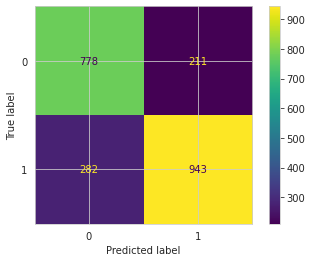

In [213]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc, test_X, test_y)
plt.show()

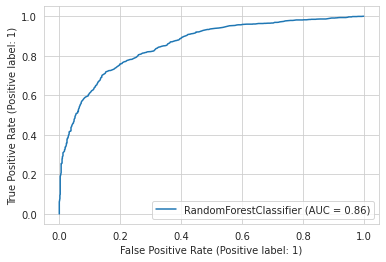

In [214]:
plot_roc_curve(rfc, test_X, test_y)

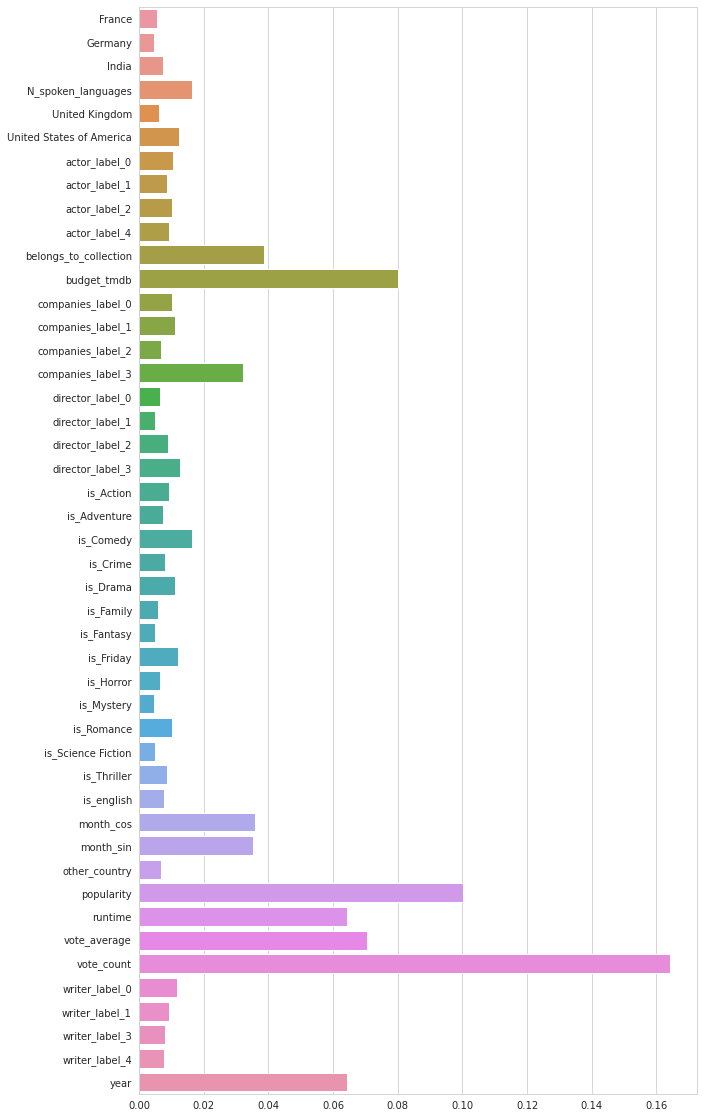

In [215]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,20))
sns.barplot(x=rfc.feature_importances_, y=train_X.columns)

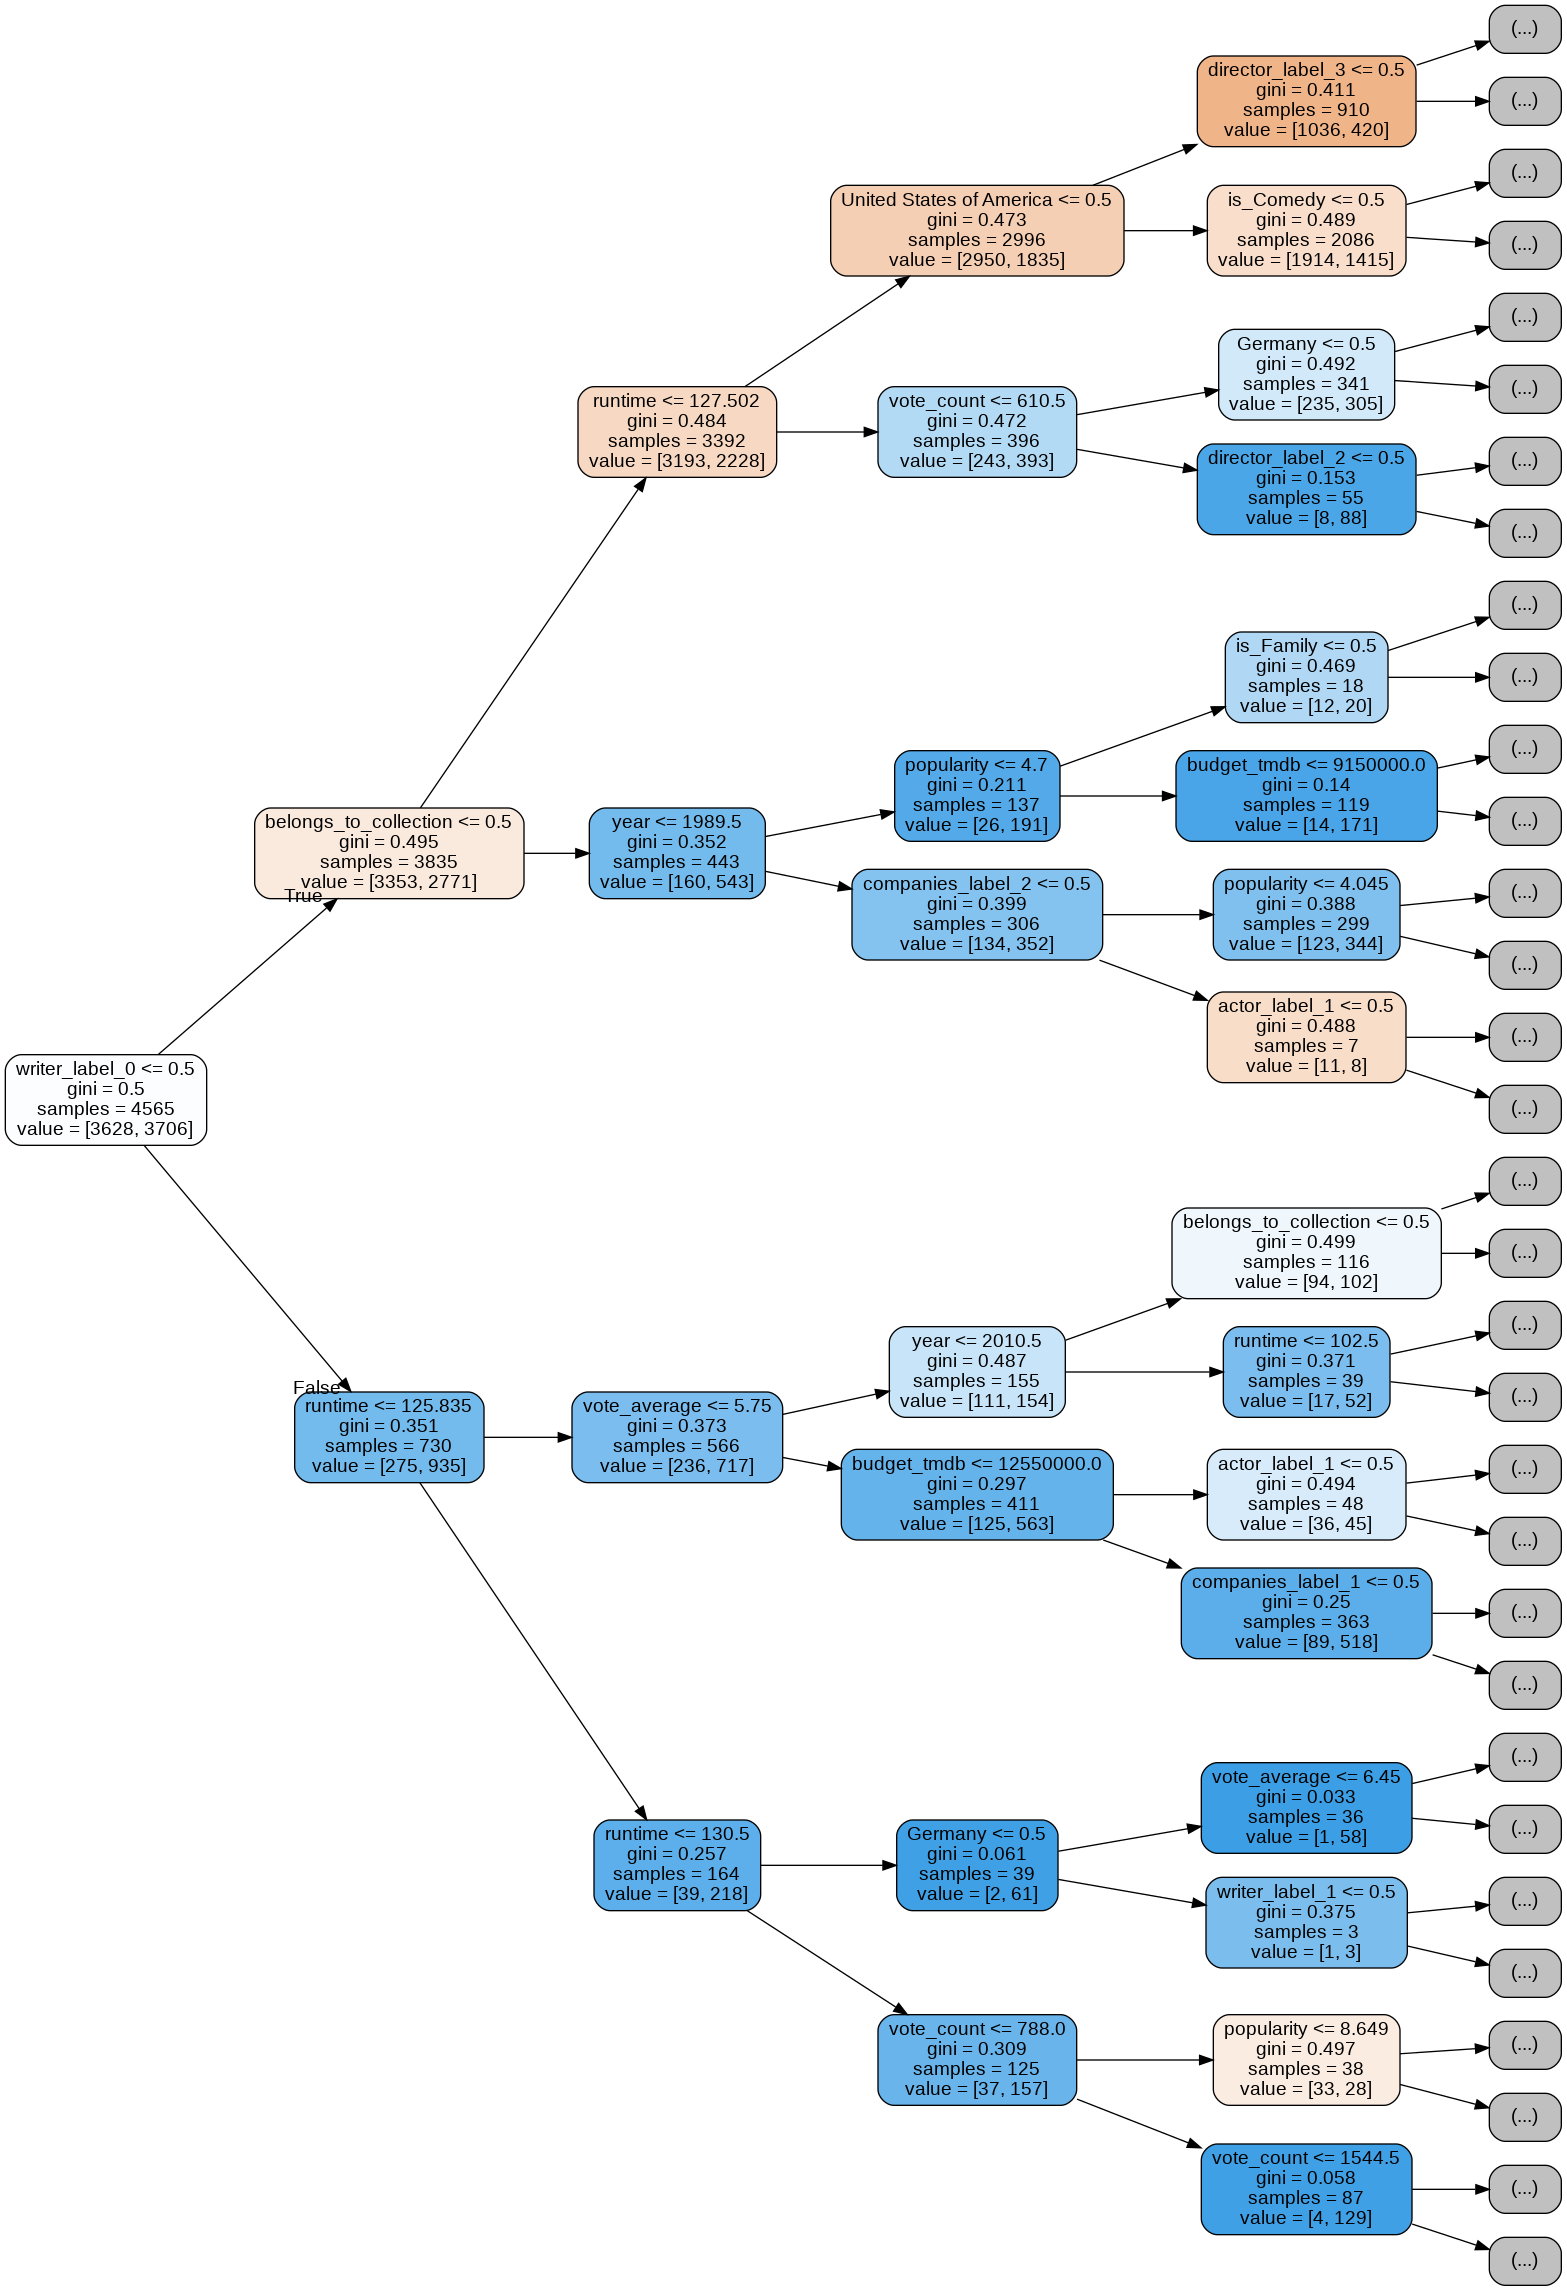

In [216]:
# visualize the actual decision tree obtained 
dot_data = export_graphviz(rfc[-1],
               out_file=None,
               max_depth=4, 
               feature_names=list(train_X.columns),  
               filled=True,
               rotate=True,
               rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<a id='gbc'></a>
### 8). GradientBoostingClassifier ([to top](#top))

In [217]:
train_X, train_y = train_X_sm, train_y_sm
test_X, test_y = test_X_no_sm, test_y_no_sm

In [218]:
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(12, train_X.shape[1], 10):
  rfe = RFE(estimator=GradientBoostingClassifier(random_state = 0), n_features_to_select=i)
  model = GradientBoostingClassifier(random_state = 0)
  models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

12 0.761 (0.027)
22 0.764 (0.025)
32 0.769 (0.023)
42 0.773 (0.023)
52 0.769 (0.029)
62 0.769 (0.029)


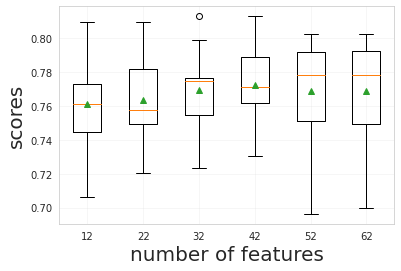

In [219]:
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, train_X[:int(len(train_X)*0.2)], train_y[:int(len(train_X)*0.2)])
 results.append(scores)
 names.append(name)
 print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('number of features', fontsize=20)
plt.ylabel('scores', fontsize=20)
plt.grid(alpha=0.2)
plt.show()

In [220]:
# create pipeline
rfe = RFE(estimator=GradientBoostingClassifier(random_state = 0), n_features_to_select=42)
# let's create a pipeline
model = GradientBoostingClassifier(random_state = 0)
# create a pipeline
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

In [221]:
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
n_scores = cross_val_score(model, train_X, train_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuray for cv: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuray for cv: 0.781 (0.008)


In [222]:
pipeline.fit(train_X, train_y)
scores = pipeline.score(test_X, test_y)
# report performance
print('Accuracy for testset: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy for testset: 0.778 (0.000)


In [223]:
# summarize all features
for i in range(train_X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 27.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 10.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 14.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 20.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected True, Rank: 1.000
Column: 25, Selected True, 

In [224]:
train_X, test_X = train_X.loc[:, rfe.support_], test_X.loc[:, rfe.support_]

In [225]:
gbc_rfe = rfe

In [226]:
params = {'learning_rate': [0.01,0.001],
          'subsample'    : [0.9, 0.5],
          'n_estimators' : [500, 1000],
          'max_depth'    : [6,8]}

grid_search_cv = GridSearchCV(GradientBoostingClassifier(random_state=0),params,verbose=1,cv=5,scoring='accuracy',n_jobs=-1)
grid_search_cv.fit(train_X,train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.001], 'max_depth': [6, 8],
                         'n_estimators': [500, 1000], 'subsample': [0.9, 0.5]},
             scoring='accuracy', verbose=1)

In [227]:
grid_search_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000, 'subsample': 0.9}

In [228]:
grid_search_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=1000,
                           random_state=0, subsample=0.9)

In [229]:
gbc = grid_search_cv.best_estimator_
#gbc = GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=1000, random_state=0, subsample=0.9)
#gbc.fit(train_X, train_y)

In [230]:
train_predictions = gbc.predict(train_X)
print("Train Accuracy score:", accuracy_score(train_y, train_predictions))
test_predictions = gbc.predict(test_X)
print("Test Accuracy score:", accuracy_score(test_y, test_predictions))

Train Accuracy score: 0.9284155985819471
Test Accuracy score: 0.7872628726287263


In [231]:
precision, recall, fscore, _ = score(test_y,test_predictions,average='macro')
gbc_results = {
    "accuracy" : accuracy_score(test_y, test_predictions),
    "precision" : precision,
    "recall" : recall,
    "fscore" : fscore,
    "roc_auc" : roc_auc_score(test_y,test_predictions)
}
print('Accuracy for testset: %.4f' % gbc_results["accuracy"])
print('Precision for testset: %.4f' % gbc_results["precision"])
print('Recall for testset: %.4f' % gbc_results["recall"])
print('Fscore for testset: %.4f' % gbc_results["fscore"])
print('Roc_auc for testset: %.4f' % gbc_results["roc_auc"])

Accuracy for testset: 0.7873
Precision for testset: 0.7853
Recall for testset: 0.7879
Fscore for testset: 0.7860
Roc_auc for testset: 0.7879


In [232]:
def report_scores(test_y, test_pred):
    print(classification_report(test_y, test_pred, target_names=['flop', 'hit']))

In [233]:
#compute the performance of the model
report_scores(train_y,train_predictions)

              precision    recall  f1-score   support

        flop       0.92      0.94      0.93      3667
         hit       0.94      0.91      0.93      3667

    accuracy                           0.93      7334
   macro avg       0.93      0.93      0.93      7334
weighted avg       0.93      0.93      0.93      7334



In [234]:
#compute the performance of the model
report_scores(test_y,test_predictions)

              precision    recall  f1-score   support

        flop       0.75      0.79      0.77       989
         hit       0.82      0.78      0.80      1225

    accuracy                           0.79      2214
   macro avg       0.79      0.79      0.79      2214
weighted avg       0.79      0.79      0.79      2214



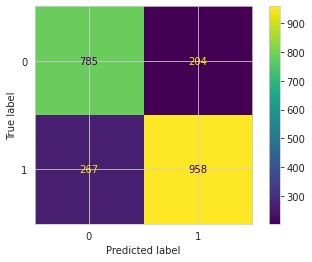

In [235]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbc, test_X, test_y)
plt.show()

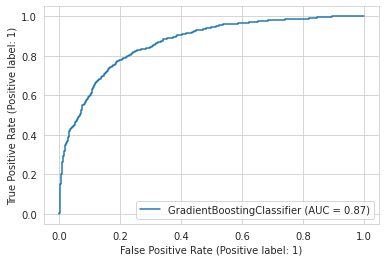

In [236]:
plot_roc_curve(gbc, test_X, test_y)

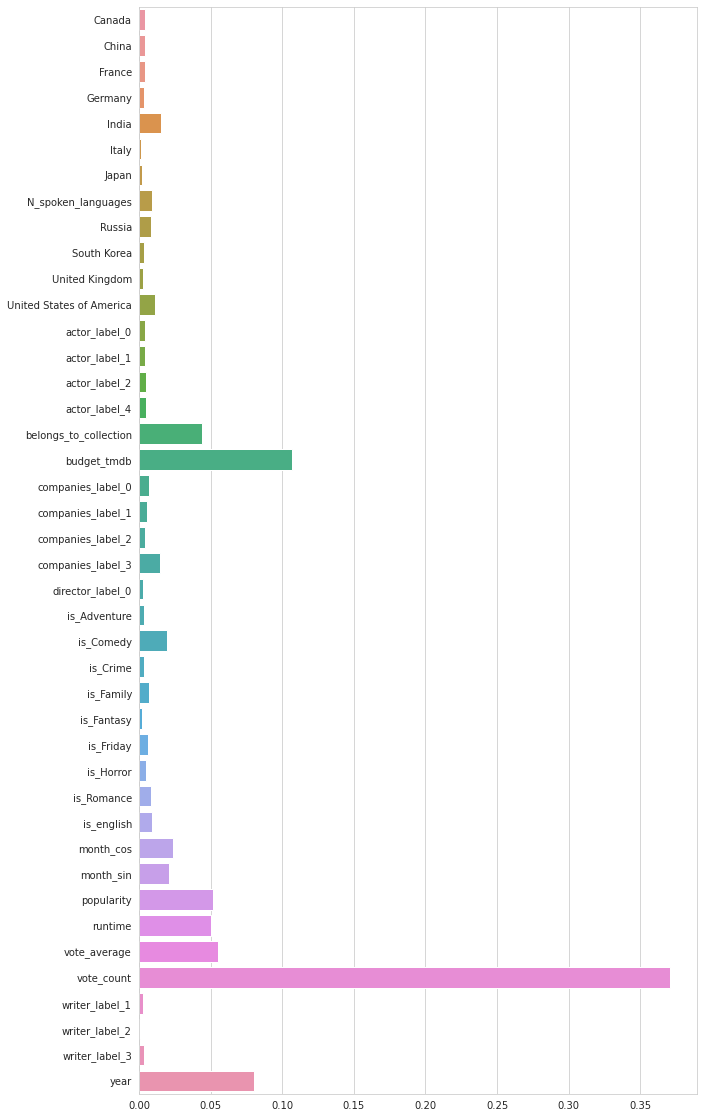

In [237]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,20))
sns.barplot(x=gbc.feature_importances_, y=train_X.columns)

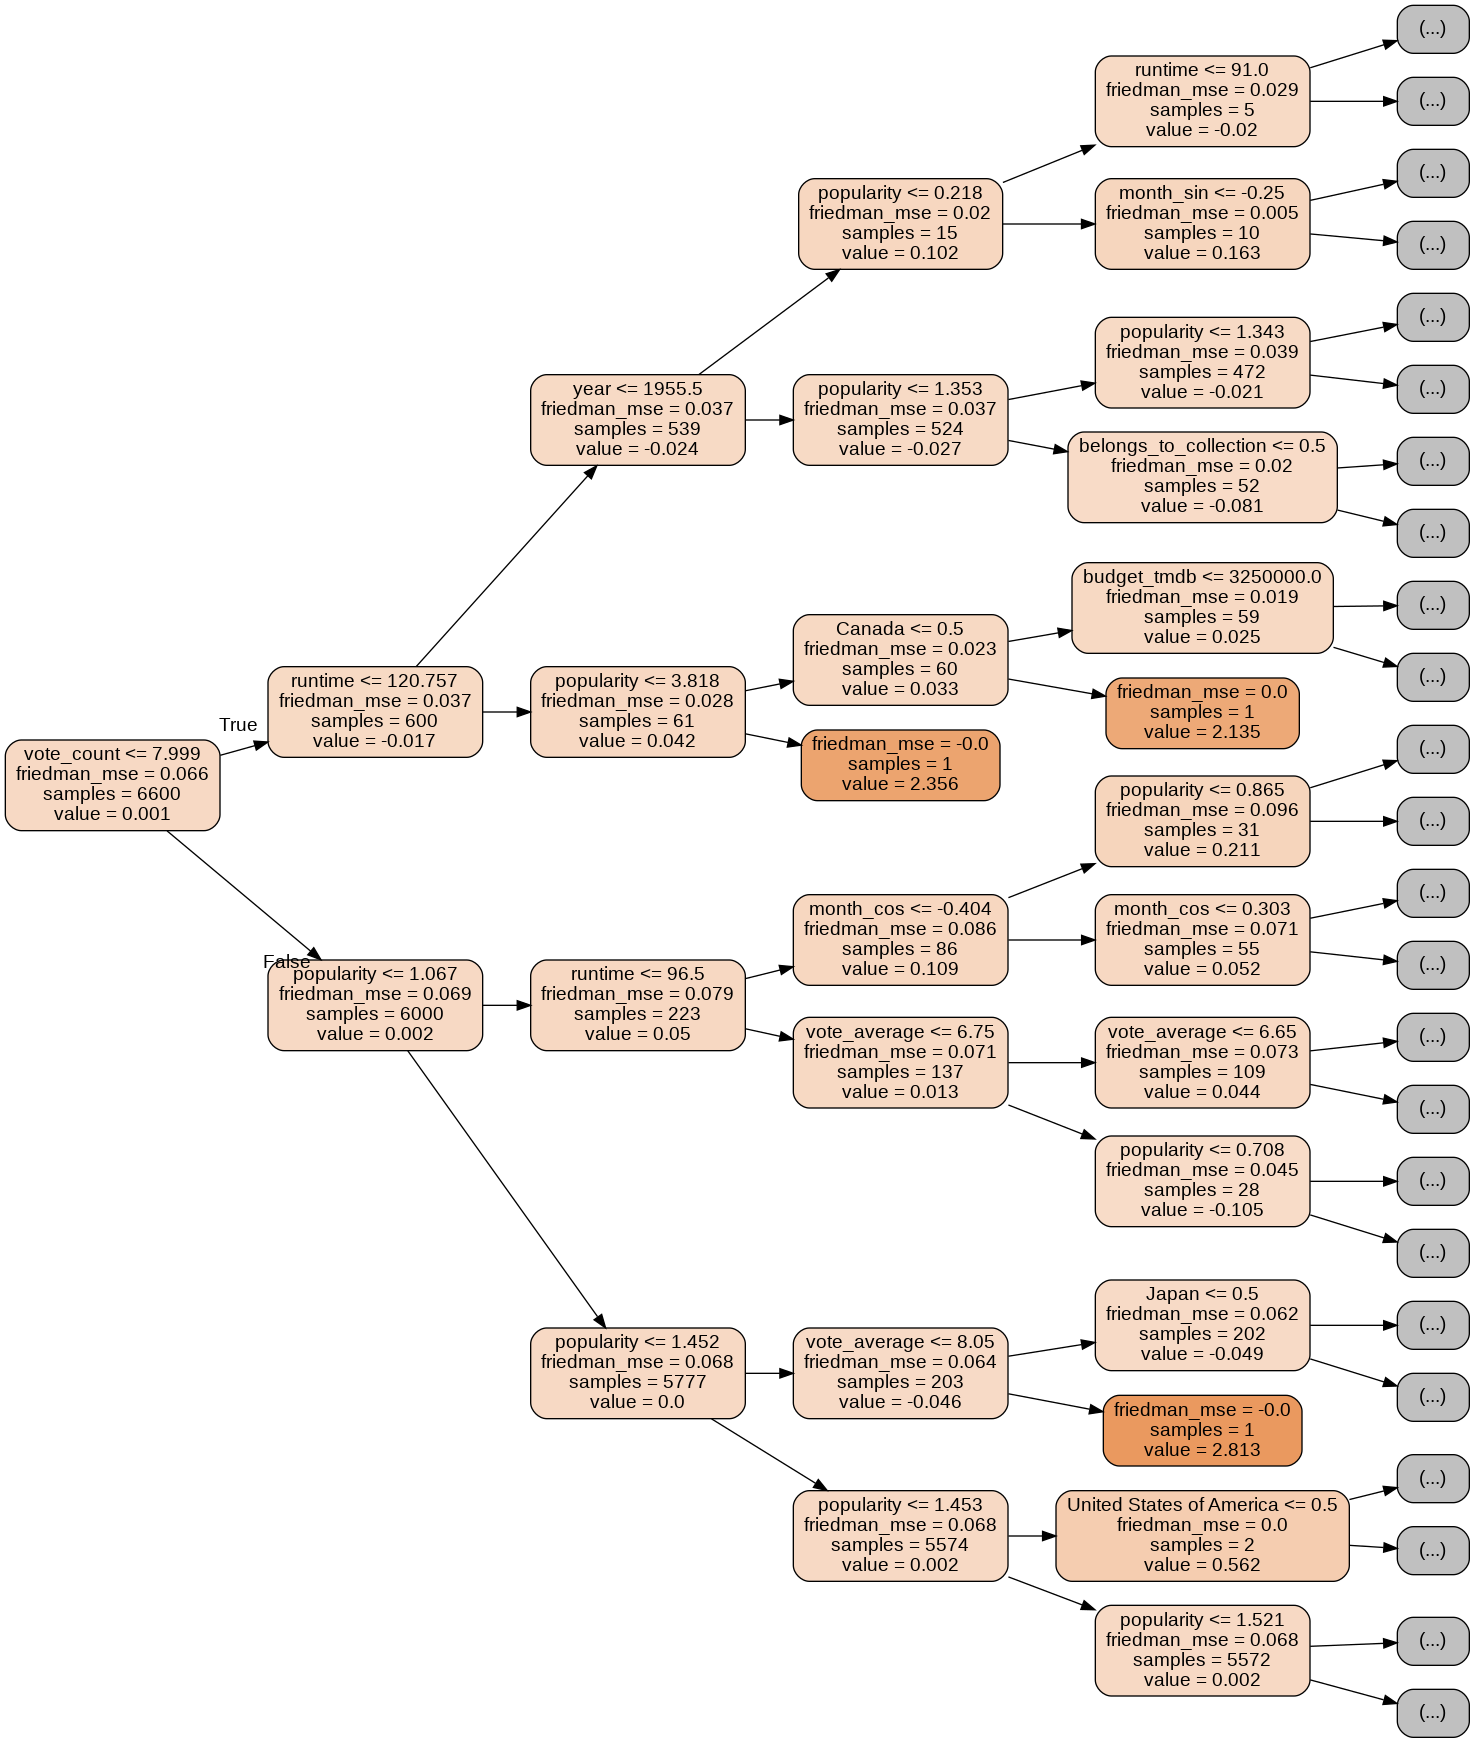

In [238]:
# visualize the actual decision tree obtained 
dot_data = export_graphviz(gbc[-1][0],
               out_file=None,
               max_depth=4, 
               feature_names=list(train_X.columns),  
               filled=True,
               rotate=True,
               rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

<a id='asc'></a>
### 9). AutoSklearnClassifier ([to top](#top))

In [239]:
train_X, train_y = train_X_sm, train_y_sm
test_X, test_y = test_X_no_sm, test_y_no_sm

In [240]:
asc = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=1000,
    per_run_time_limit=100,
    ensemble_size = 1000,
    ensemble_nbest = 1000,
    seed = 42,
    tmp_folder='/tmp/autosklearn_regression_example_clf'
)
asc.fit(train_X, train_y, dataset_name='Movies')

AutoSklearnClassifier(ensemble_nbest=1000, ensemble_size=1000,
                      per_run_time_limit=100, seed=42,
                      time_left_for_this_task=1000,
                      tmp_folder='/tmp/autosklearn_regression_example_clf')

In [241]:
print(asc.leaderboard())

          rank  ensemble_weight         type      cost  duration
model_id                                                        
61           1            0.263  extra_trees  0.259397  3.635284
91           2            0.011          qda  0.271375  1.694809
99           3            0.013          qda  0.271789  1.698640
89           4            0.010          qda  0.272202  1.887640
88           5            0.092          qda  0.273854  1.366724
58           6            0.003  gaussian_nb  0.283767  1.728908
97           7            0.095          qda  0.285006  1.557589
92           8            0.004  gaussian_nb  0.285006  2.489105
82           9            0.024          qda  0.285006  1.252589
100         10            0.026          qda  0.285419  1.235305
87          11            0.004          qda  0.296159  1.249870
86          12            0.007          qda  0.296159  1.218392
80          13            0.002          qda  0.296159  1.357483
77          14           

In [242]:
print(asc.show_models())

[(0.283000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'qda', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'classifier:qda:reg_param': 0.7502621051536047, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:feature_agglomeration:affinity': 'euclidean', 'feature_preprocessor:feature_agglomeration:linkage': 'average', 'feature_preprocessor:feature_agglomeration:n_clusters': 18, 'feature_preprocessor:feature_agglomeration:pooling_func': 'mean', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:minority_

In [243]:
train_predictions = asc.predict(train_X)
print("Train Accuracy score:", sklearn.metrics.accuracy_score(train_y, train_predictions))
test_predictions = asc.predict(test_X)
print("Test Accuracy score:", sklearn.metrics.accuracy_score(test_y, test_predictions))

Train Accuracy score: 0.7555222252522498
Test Accuracy score: 0.7131887985546522


In [244]:
precision, recall, fscore, _ = score(test_y,test_predictions,average='macro')
asc_results = {
    "accuracy" : accuracy_score(test_y, test_predictions),
    "precision" : precision,
    "recall" : recall,
    "fscore" : fscore,
    "roc_auc" : roc_auc_score(test_y,test_predictions)
}
print('Accuracy for testset: %.4f' % asc_results["accuracy"])
print('Precision for testset: %.4f' % asc_results["precision"])
print('Recall for testset: %.4f' % asc_results["recall"])
print('Fscore for testset: %.4f' % asc_results["fscore"])
print('Roc_auc for testset: %.4f' % asc_results["roc_auc"])

Accuracy for testset: 0.7132
Precision for testset: 0.7166
Recall for testset: 0.7185
Fscore for testset: 0.7130
Roc_auc for testset: 0.7185


In [245]:
def report_scores(test_y, test_pred):
    print(classification_report(test_y, test_pred, target_names=['flop', 'hit']))

In [246]:
#compute the performance of the model
report_scores(train_y,train_predictions)

              precision    recall  f1-score   support

        flop       0.73      0.81      0.77      3667
         hit       0.79      0.70      0.74      3667

    accuracy                           0.76      7334
   macro avg       0.76      0.76      0.75      7334
weighted avg       0.76      0.76      0.75      7334



In [247]:
#compute the performance of the model
report_scores(test_y,test_predictions)

              precision    recall  f1-score   support

        flop       0.65      0.77      0.71       989
         hit       0.78      0.67      0.72      1225

    accuracy                           0.71      2214
   macro avg       0.72      0.72      0.71      2214
weighted avg       0.72      0.71      0.71      2214



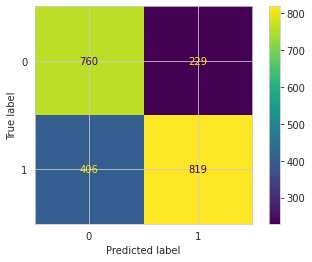

In [248]:
#it is possible to plot the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(asc, test_X, test_y)
plt.show()

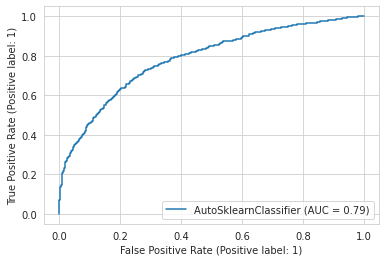

In [249]:
plot_roc_curve(asc, test_X, test_y)

<a id='expc'></a>
### 10). Experiments ([to top](#top))

In [573]:
all_models = [
    ("Dummy", dc_results, dc),
    ("DecisionTree", dtc_results, [dtc, dtc_rfe]),
    ("Multi-layer Perceptron", mlpc_results, mlpc),
    ("MLP Bagging", mlpc_bagging_results, mlpc_bagging),
    ("Convolutional NN", cnnc_results, cnnc),
    ("CNN-SVM", csc_results, [svc,cm1]),
    ("RandomForest", rfc_results, [rfc, rfc_rfe]),
    ("GradientBossting", gbc_results, [gbc, gbc_rfe]),
    ("AutoSklearn", asc_results, asc)
]
table = [[model_name,
          "%4.2f%%" % (100*model_results["accuracy"]),
          "%4.2f%%" % (100*model_results["precision"]),
          "%4.2f%%" % (100*model_results["recall"]),
          "%4.2f%%" % (100*model_results["fscore"]),
          "%4.2f%%" % (100*model_results["roc_auc"])]
         for model_name, model_results, model in all_models]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["Accuracy", "Precision", "Recall", "F-score", "ROC-AUC"])))

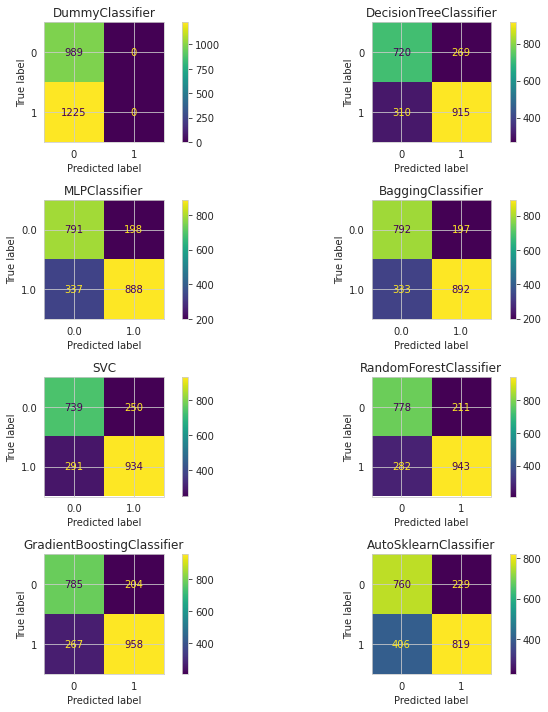

In [574]:
train_X, train_y, test_X, test_y = train_X_sm, train_y_sm, test_X_no_sm, test_y_no_sm
train_X_c_m, test_X_c_m, train_y_c_m, test_y_c_m = train_test_split(X_c_m, y_c_m, train_size=0.75, test_size=0.25, random_state=0)
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
models = all_models.copy()
models.remove(models[4])
for cls, ax in zip(models, axs.flatten()):
  if cls[0] in ['Multi-layer Perceptron', "MLP Bagging"]:
    plot_confusion_matrix(cls[-1], test_X_c_m, test_y_c_m, ax=ax)
    ax.title.set_text(type(cls[-1]).__name__)
  elif isinstance(cls[-1], list):
    if cls[0] == "CNN-SVM":
      plot_confusion_matrix(cls[-1][0], cls[-1][1].predict(test_X_c_m), test_y_c_m, ax=ax)
      ax.title.set_text(type(cls[-1][0]).__name__)
    else:
      plot_confusion_matrix(cls[-1][0], test_X.loc[:, cls[-1][1].support_], test_y, ax=ax)
      ax.title.set_text(type(cls[-1][0]).__name__)
  else:
    plot_confusion_matrix(cls[-1], test_X, test_y, ax=ax)
    ax.title.set_text(type(cls[-1]).__name__)

fig.tight_layout()
plt.show()

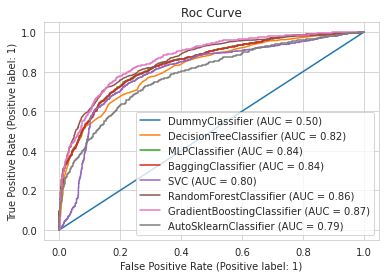

In [578]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
ax.set_title('Roc Curve')
for cls in models:
  if cls[0] in ['Multi-layer Perceptron', "MLP Bagging"]:
    plot_roc_curve(cls[-1], test_X_c_m, test_y_c_m, ax=ax)
  elif isinstance(cls[-1], list):
    if cls[0] == "CNN-SVM":
      plot_roc_curve(cls[-1][0], cls[-1][1].predict(test_X_c_m), test_y_c_m, ax=ax)
    else:
      plot_roc_curve(cls[-1][0], test_X.loc[:, cls[-1][1].support_], test_y, ax=ax)
  else:
    plot_roc_curve(cls[-1], test_X, test_y, ax=ax)

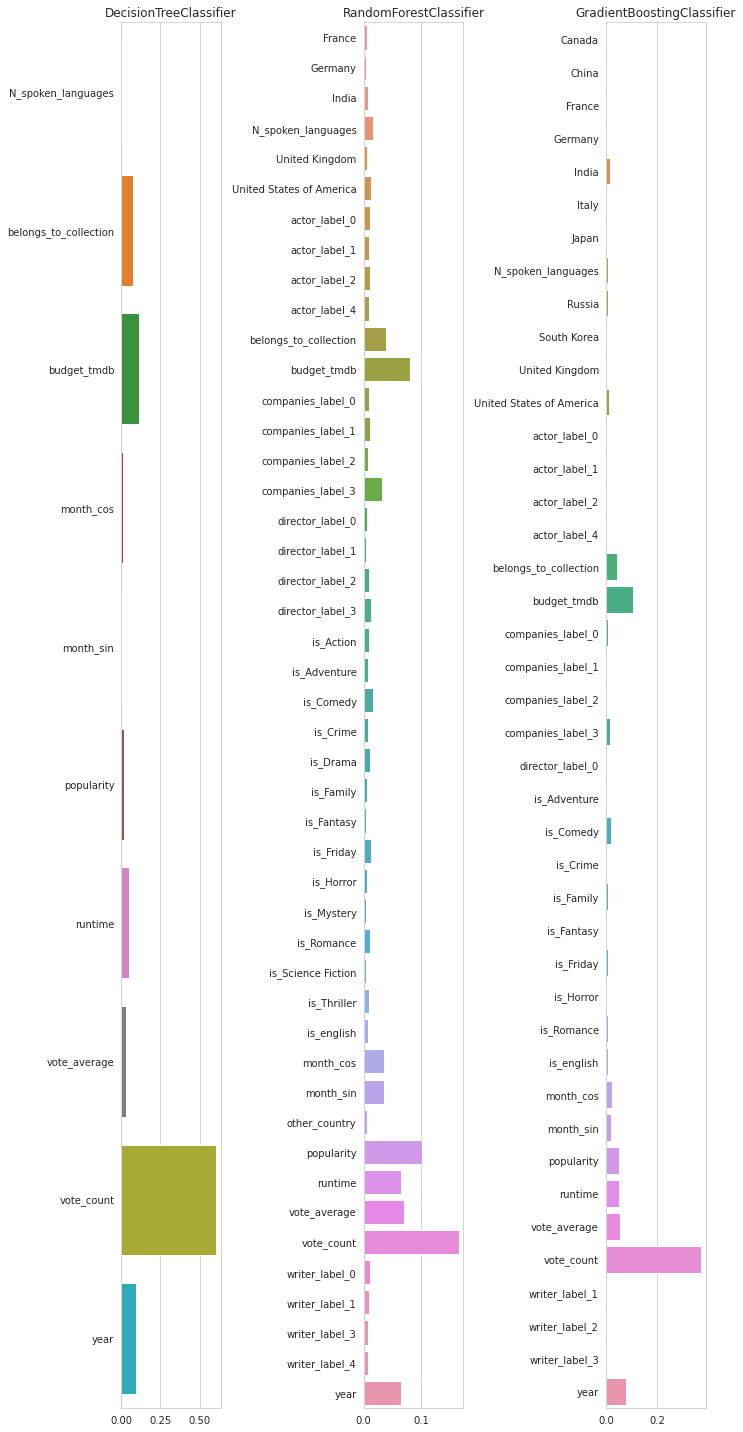

In [576]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 20))
classifiers = [dtc, rfc, gbc]
rfes = [dtc_rfe, rfc_rfe, gbc_rfe]
for cls, rfe, ax in zip(classifiers, rfes, axs.flatten()):
  sns.barplot(x=cls.feature_importances_, y=train_X.loc[:, rfe.support_].columns, ax=ax)
  ax.title.set_text(type(cls).__name__)

fig.tight_layout()
plt.show()

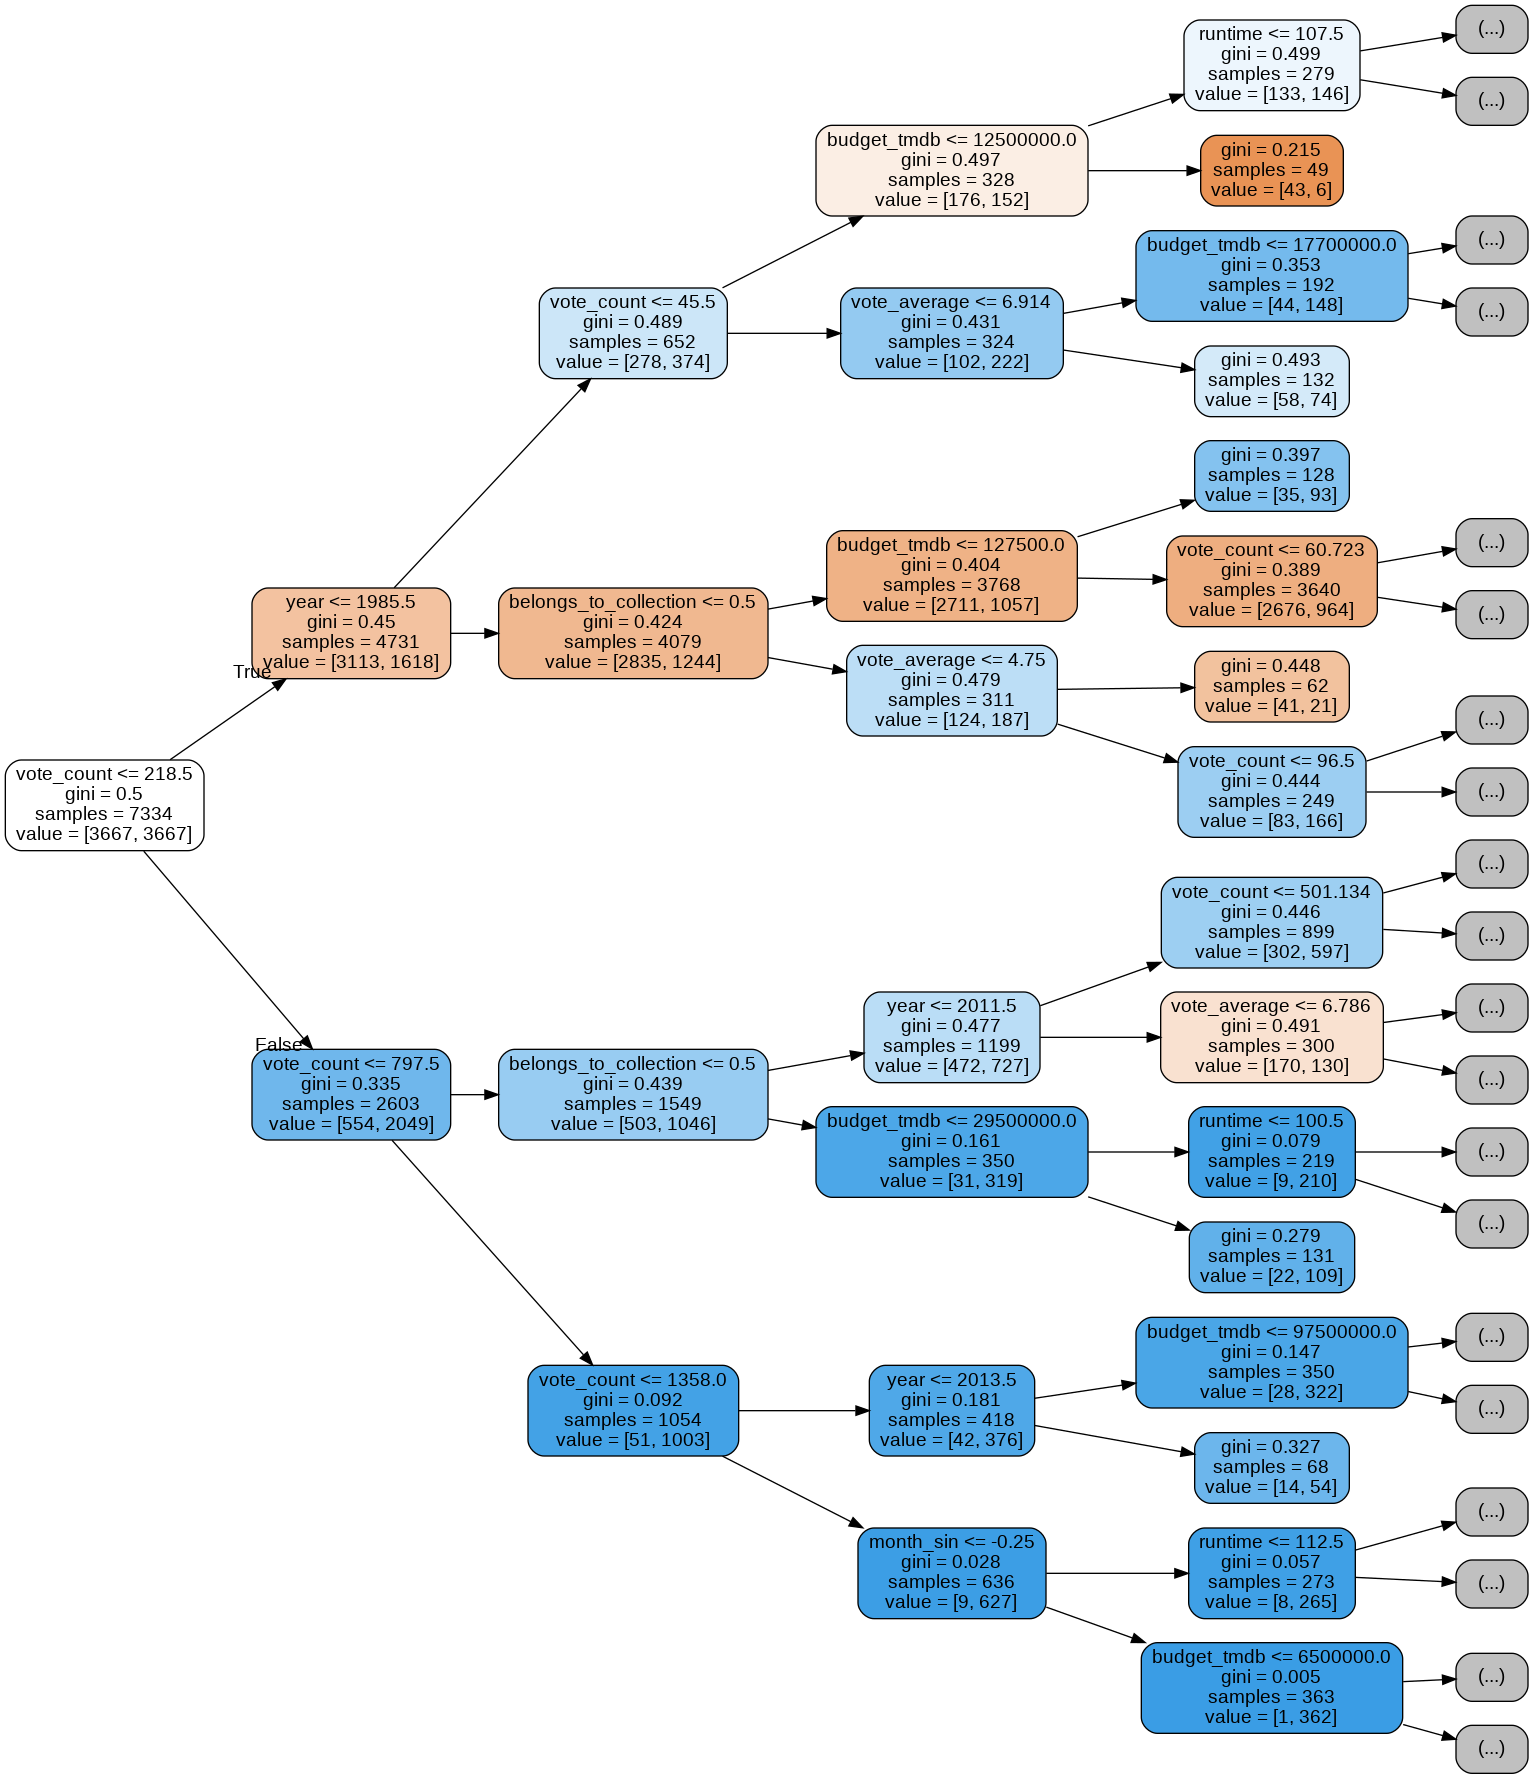

In [577]:
# visualize the actual decision tree obtained 
dot_data = export_graphviz(dtc,
               out_file=None,
               max_depth=4, 
               feature_names=list(train_X.loc[:, dtc_rfe.support_].columns),  
               filled=True,
               rotate=True,
               rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# Save the notebook ([to top](#top))

In [580]:
!pip install jovian --upgrade --quiet
import jovian
# Execute this to save new versions of the notebook
jovian.commit(project="models-implementation-and-evaluation")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/lilanpei/models-implementation-and-evaluation


'https://jovian.ai/lilanpei/models-implementation-and-evaluation'